# House Price Prediction using Advanced Regression Techniques

## Exploratory Data Analysis (EDA) and Data Preprocessing

In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')
#Reading the datasets
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
#Checking duplicate rows
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [ ]:
#Removing 'Id' columns of the test set in a list
id_column = list(df_test['Id'])

#Drop
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

## Exploring Numerical Features

In [ ]:
df_train_num = df_train.select_dtypes(include='number')
df_test_num = df_test.select_dtypes(include= 'number')
#New Dataframes
df_train_num.info()
df_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

## Data Distribution

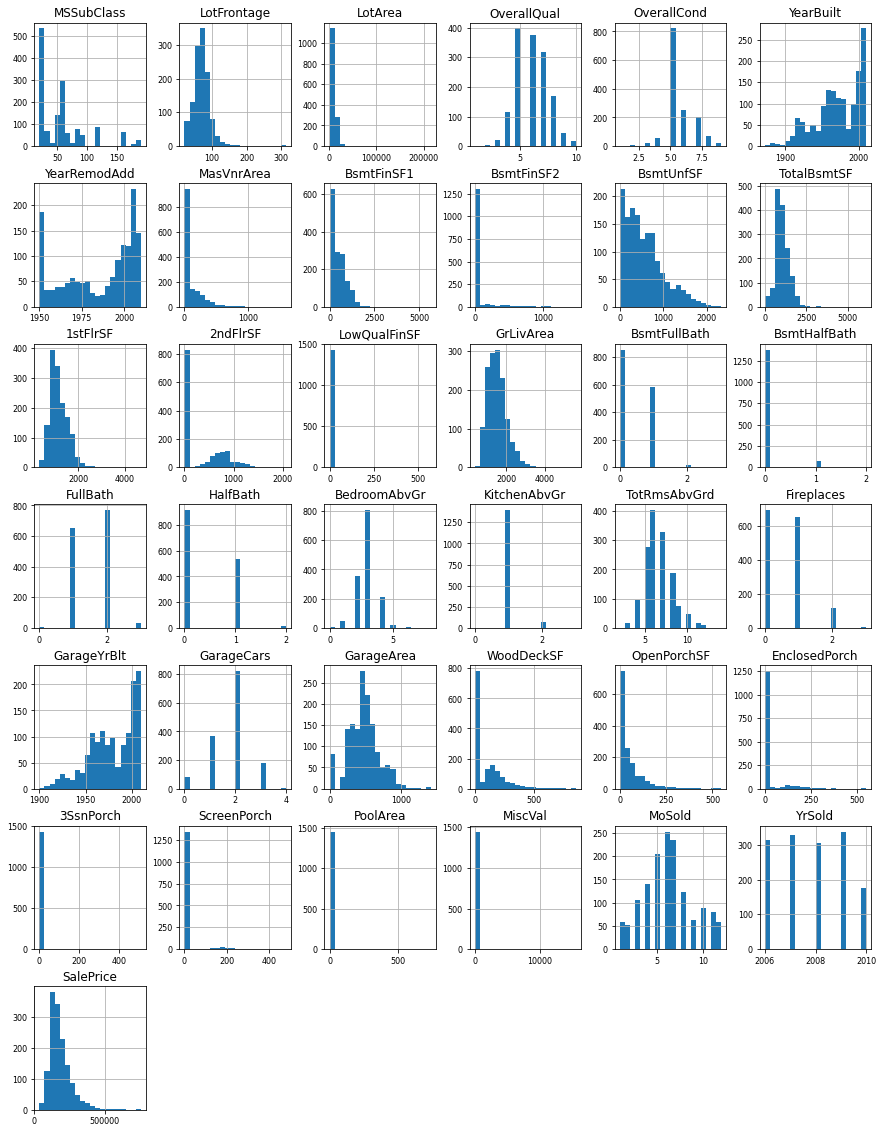

In [ ]:
df_train_num.hist(figsize=(15, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

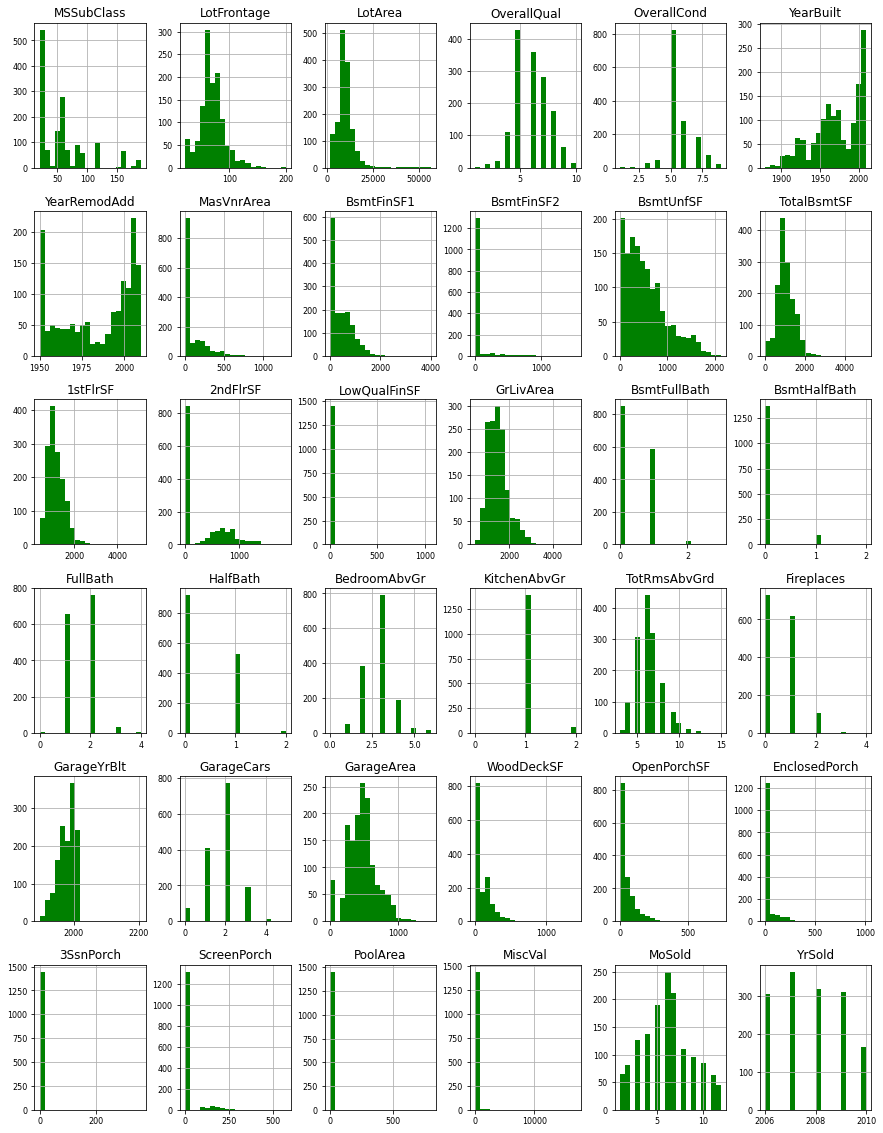

In [ ]:
df_test_num.hist(figsize=(15, 20), bins=20, xlabelsize=8, ylabelsize=8, color='green')
plt.show()

## Feature Selection (Train and Test Dataset)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
sel_constant = VarianceThreshold(threshold=0)

In [ ]:
sel_qsi_const = VarianceThreshold(threshold=0.05)

sel_constant.fit(df_train_num)
sel_qsi_const.fit(df_train_num)

VarianceThreshold(threshold=0.05)

In [ ]:
#Getting the retained features from the feature selection process
ret_const = sel_constant.get_support()
ret_qsi_const = sel_qsi_const.get_support()

In [ ]:
const_columns = [col for col in df_train_num.columns if col not in df_train_num.columns[ret_const] ]

In [ ]:
qsi_const_columns = [col for col in df_train_num.columns if col not in df_train_num.columns[ret_qsi_const]]

In [ ]:
print(f"Number of features that are retained after constant variance check: {sum(ret_const)}")

Number of features that are retained after constant variance check: 37


In [ ]:
print(f"Number of features that are retained after quasi_constant variance check: {sum(ret_qsi_const)}")

Number of features that are retained after quasi_constant variance check: 36


In [ ]:
print(f"The variables that have about 95% of constant values are: {qsi_const_columns}")

The variables that have about 95% of constant values are: ['KitchenAbvGr']


In [ ]:
#Same process for the dataset
sel_constant.fit(df_test_num)
sel_qsi_const.fit(df_test_num)

VarianceThreshold(threshold=0.05)

In [ ]:
ret_const_test = sel_constant.get_support()
ret_qsi_const_test = sel_qsi_const.get_support()

In [ ]:
const_columns_test = [col for col in df_test_num.columns if col not in df_test_num.columns[ret_const_test]]

In [ ]:
qsi_const_columns_test = [col for col in df_test_num.columns if col not in df_test_num.columns[ret_qsi_const_test]]

In [ ]:
print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const_test)}")

Number of features that are retained after constant variance check: 36


In [ ]:
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const_test)}")

Number of features that are retained after quasi_constant variance check: 35


In [ ]:
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns_test}")

The variables that have about 95% of constant values are: ['KitchenAbvGr']


In [ ]:
df_train = df_train.drop('KitchenAbvGr', axis=1)
df_test = df_test.drop('KitchenAbvGr', axis=1)

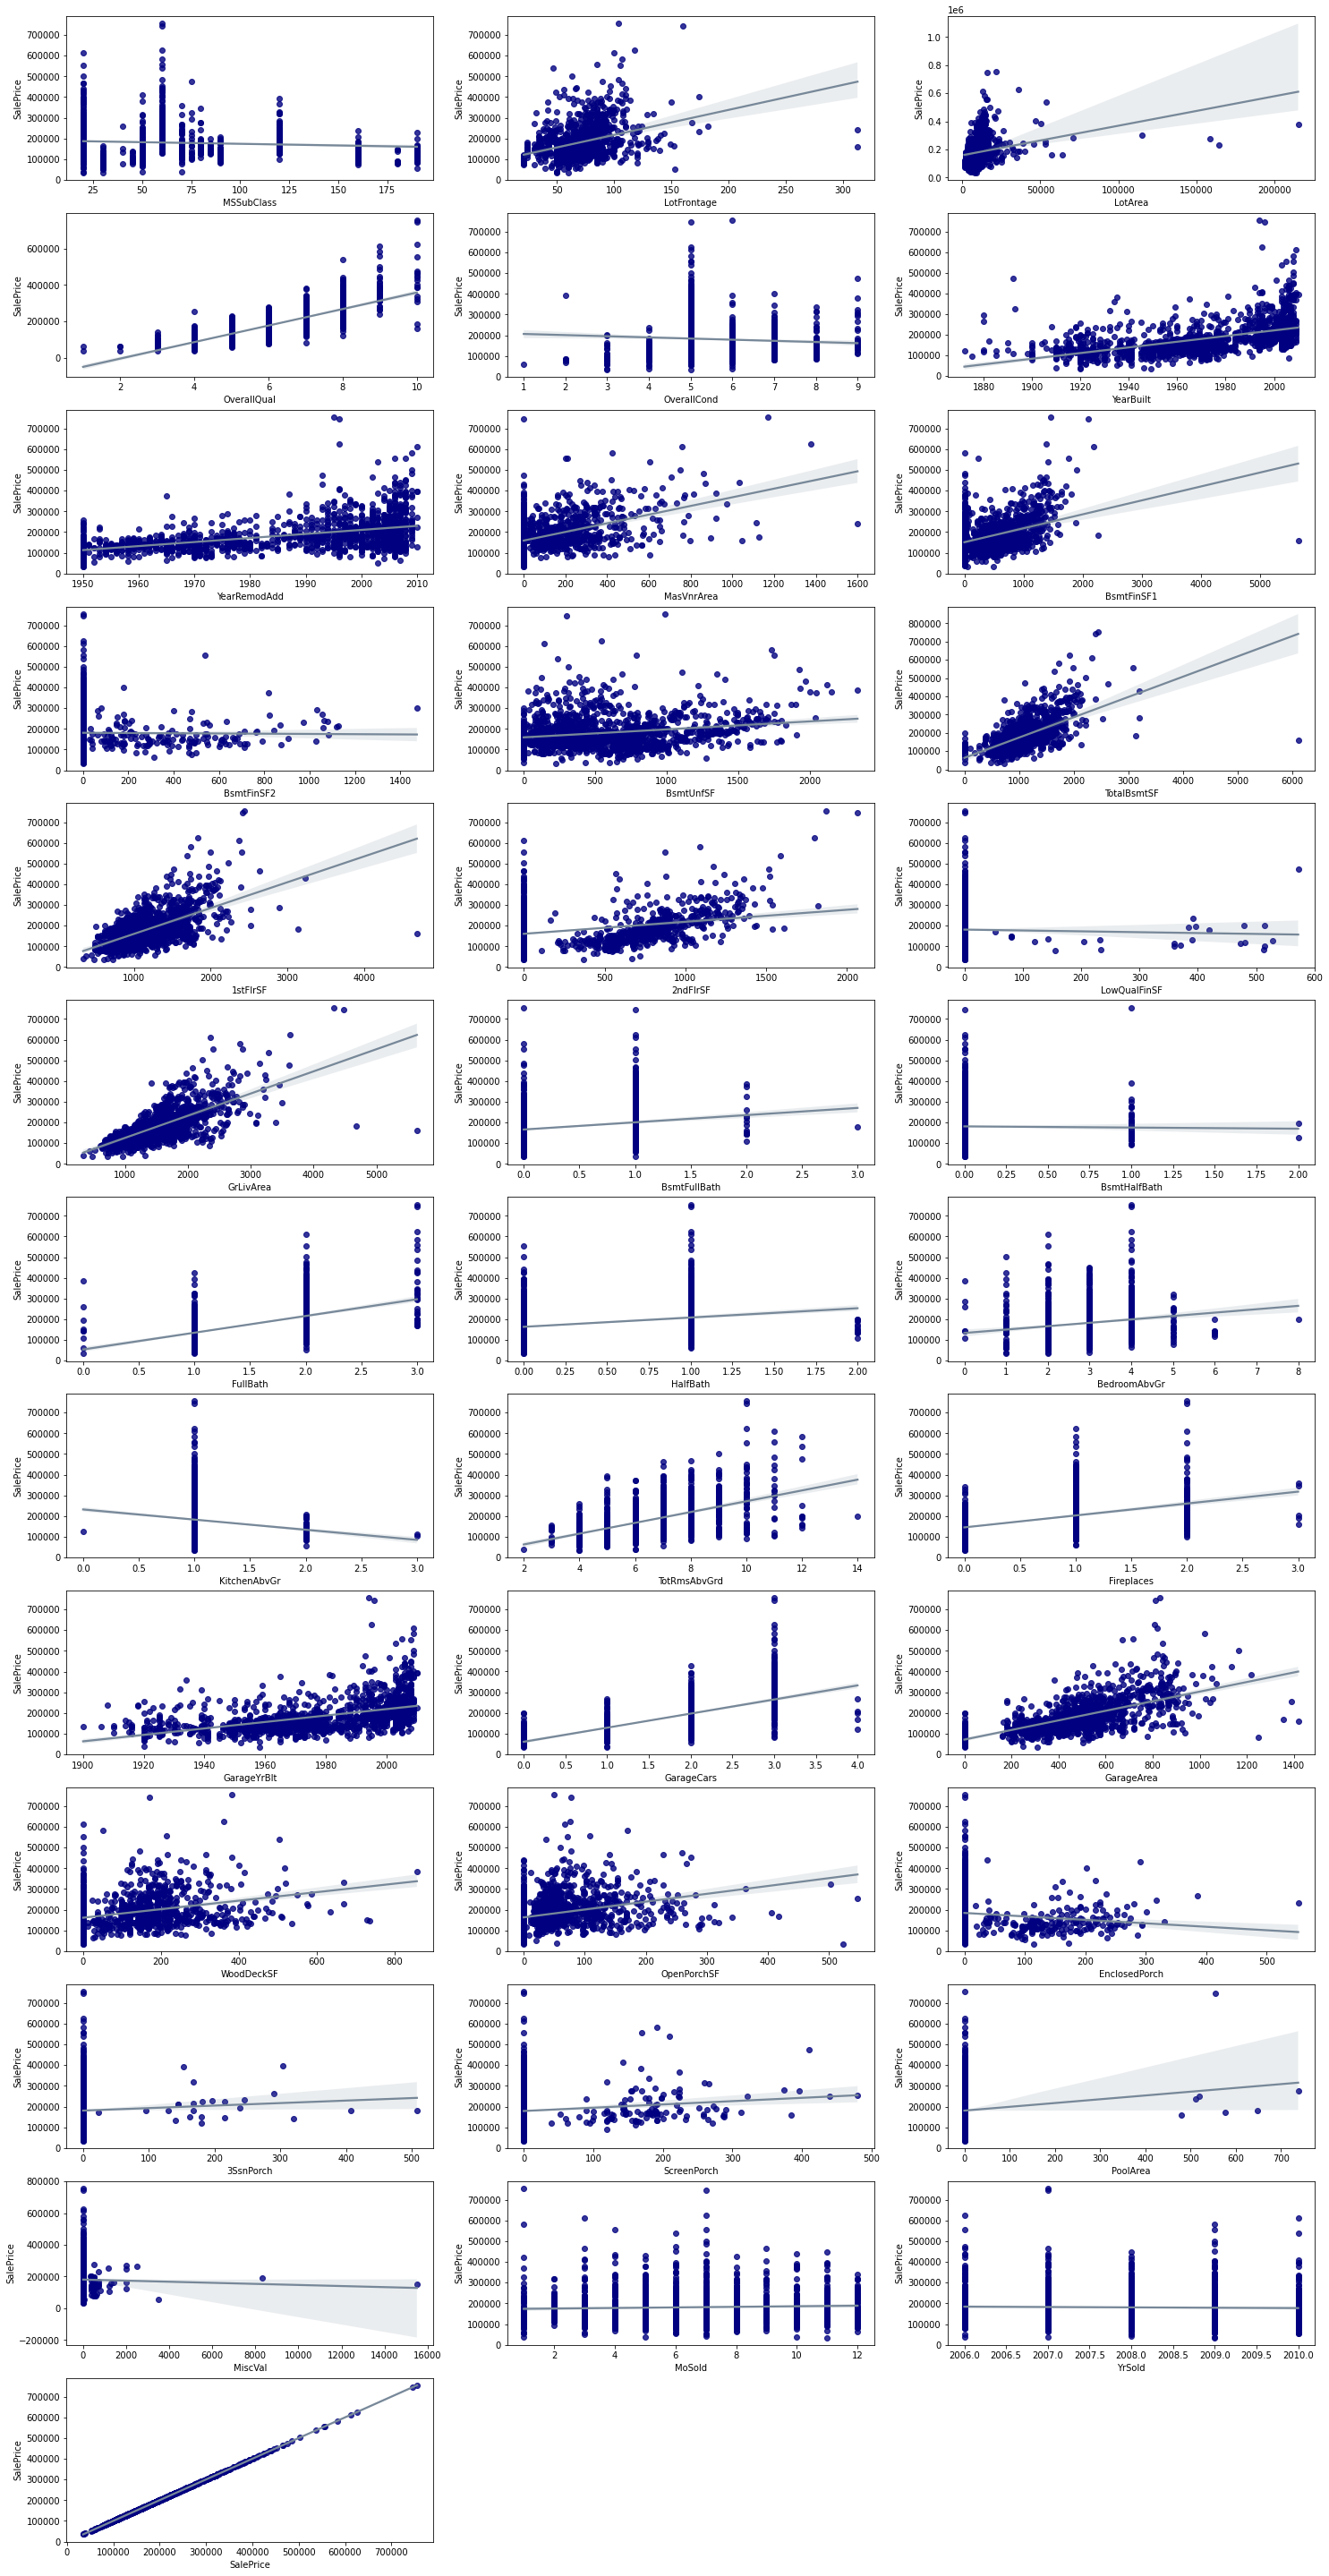

In [ ]:
#Visualizing correlations between variables

count = 1
plt.subplots(figsize=(25,60))
for i in df_train_num.columns:
  plt.subplot(15,3,count)
  sns.regplot(df_train_num[i], df_train_num['SalePrice'],
              scatter_kws={'color': 'navy'},
              line_kws={'color': 'lightslategrey'})
  count+=1
plt.show()

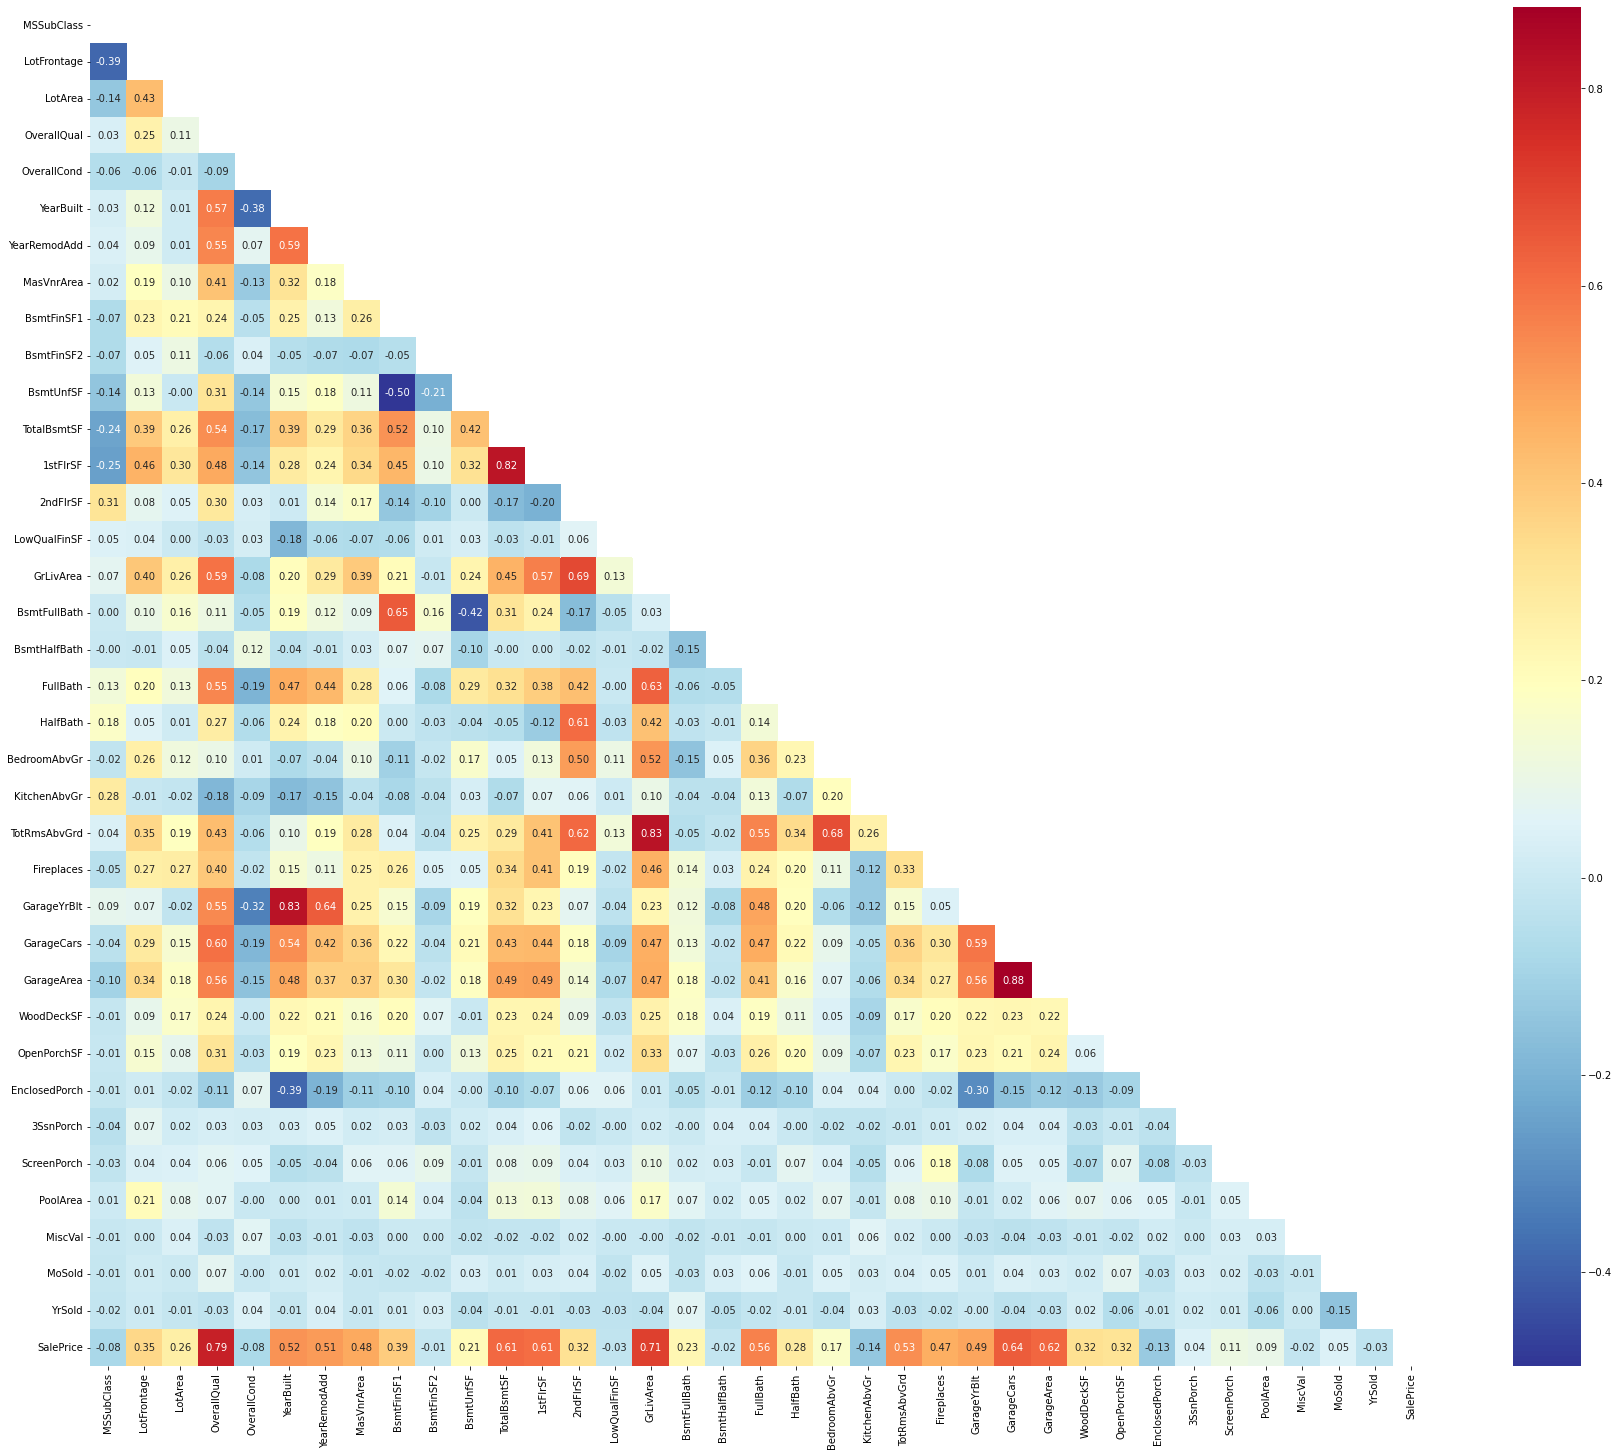

In [ ]:
#Correlation Matrix 
plt.figure(figsize=(30,25)) 

corr_matrix = df_train_num.corr()

mask_upp = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, cmap="RdYlBu_r" ,annot=True, fmt='.2f', mask = mask_upp)

plt.show()


In [ ]:
#Features with high correlation with other features
multicol_features = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
#Dropping multicolinear features because they increase model complexity and risk of errors.
df_train_num = df_train_num.drop(multicol_features, axis=1)
df_test_num = df_test_num.drop(multicol_features, axis=1)

In [ ]:
#Creating a series of each feature with the dependent variable
df_num_corr = df_train_num.corr()["SalePrice"][:-1]
#Storing strongly correlated features with dependent variable
strong_features = list(abs(df_num_corr[df_num_corr >= 0.7]).index)
#Storing moderately correlated features with dependent variable
moderate_features = list(abs(df_num_corr[(df_num_corr >= 0.4) & (df_num_corr < 0.7)]).index)
#Storing weakly correlated features with dependent variable
weak_features = list(abs(df_num_corr[(df_num_corr >= 0.1) & (df_num_corr < 0.4)]).index)
#Retaining strong, moderate, weak features and ignoring the rest
list_keep = strong_features + moderate_features + weak_features
list_keep.append('SalePrice')
#Creating a new dataframe with all the retained features
df_train_num = df_train_num.loc[:, list_keep]
df_test_num = df_test_num.loc[:,list_keep[:-1]]

In [ ]:
#Verifying the numercal train set
df_train_num.loc[:, list_keep[:]]

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,LotFrontage,...,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,7,1710,2003,2003,196.0,856,2,0,2,65.0,...,706,150,854,1,1,3,0,61,0,208500
1,6,1262,1976,1976,0.0,1262,2,1,2,80.0,...,978,284,0,0,0,3,298,0,0,181500
2,7,1786,2001,2002,162.0,920,2,1,2,68.0,...,486,434,866,1,1,3,0,42,0,223500
3,7,1717,1915,1970,0.0,756,1,1,3,60.0,...,216,540,756,1,0,3,0,35,0,140000
4,8,2198,2000,2000,350.0,1145,2,1,3,84.0,...,655,490,1053,1,1,4,192,84,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,1999,2000,0.0,953,2,1,2,62.0,...,0,953,694,0,1,3,0,40,0,175000
1456,6,2073,1978,1988,119.0,1542,2,2,2,85.0,...,790,589,0,1,0,3,349,0,0,210000
1457,7,2340,1941,2006,0.0,1152,2,2,1,66.0,...,275,877,1152,0,0,4,0,60,0,266500
1458,5,1078,1950,1996,0.0,1078,1,0,1,68.0,...,49,0,0,1,0,2,366,0,0,142125


In [ ]:
#Verifying the numerical test set
df_test_num.loc[:,list_keep[:-1]]

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,WoodDeckSF,OpenPorchSF,ScreenPorch
0,5,896,1961,1961,0.0,882.0,1,0,1.0,80.0,11622,468.0,270.0,0,0.0,0,2,140,0,120
1,6,1329,1958,1958,108.0,1329.0,1,0,1.0,81.0,14267,923.0,406.0,0,0.0,1,3,393,36,0
2,5,1629,1997,1998,0.0,928.0,2,1,2.0,74.0,13830,791.0,137.0,701,0.0,1,3,212,34,0
3,6,1604,1998,1998,20.0,926.0,2,1,2.0,78.0,9978,602.0,324.0,678,0.0,1,3,360,36,0
4,8,1280,1992,1992,0.0,1280.0,2,0,2.0,43.0,5005,263.0,1017.0,0,0.0,0,2,0,82,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,1970,1970,0.0,546.0,1,0,0.0,21.0,1936,0.0,546.0,546,0.0,1,3,0,0,0
1455,4,1092,1970,1970,0.0,546.0,1,0,1.0,21.0,1894,252.0,294.0,546,0.0,1,3,0,24,0
1456,5,1224,1960,1996,0.0,1224.0,1,1,2.0,160.0,20000,1224.0,0.0,0,1.0,0,4,474,0,0
1457,5,970,1992,1992,0.0,912.0,1,0,0.0,62.0,10441,337.0,575.0,0,0.0,0,3,80,32,0


## Addressing Missing Data amongst Numerical Features

In [ ]:
#Exploring features with missing values in both training and testing data
col_nan_train = df_train_num.loc[:, df_train_num.isnull().any()].columns
col_nan_test = df_test_num.loc[:, df_test_num.isnull().any()].columns

In [ ]:
#Building a dataframe for features with missing values 
cols_train = []
percent_nan_train = []

for i in col_nan_train:
  cols_train.append(i)
  percent_nan_train.append(round(df_train_num[i].isnull().sum() * 100/len(df_train_num),2))

missing_df_train = pd.DataFrame(np.array(cols_train), columns=["columns"])
missing_df_train['percent_nan'] = np.array(percent_nan_train)

print(missing_df_train)

       columns  percent_nan
0   MasVnrArea         0.55
1  LotFrontage        17.74


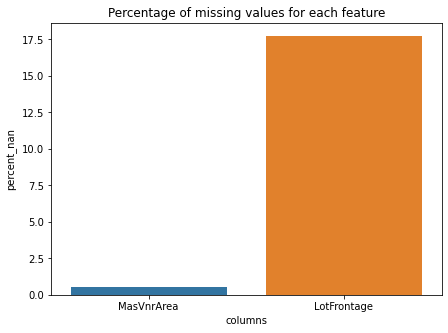

In [ ]:
#Visualizing train dataset missing features
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_train, x='columns', y = 'percent_nan')
plt.title('Percentage of missing values for each feature')
plt.show()

In [ ]:
#Same step for the train set
cols_test = []
percent_nan_test = []

for i in col_nan_test:
  cols_test.append(i)
  percent_nan_test.append(round(df_test_num[i].isnull().sum() * 100/len(df_test_num),2))

missing_df_test = pd.DataFrame(np.array(cols_test), columns=["columns"])
missing_df_test['percent_nan'] = np.array(percent_nan_test)

print(missing_df_test)

        columns  percent_nan
0    MasVnrArea         1.03
1   TotalBsmtSF         0.07
2    GarageCars         0.07
3   LotFrontage        15.56
4    BsmtFinSF1         0.07
5     BsmtUnfSF         0.07
6  BsmtFullBath         0.14


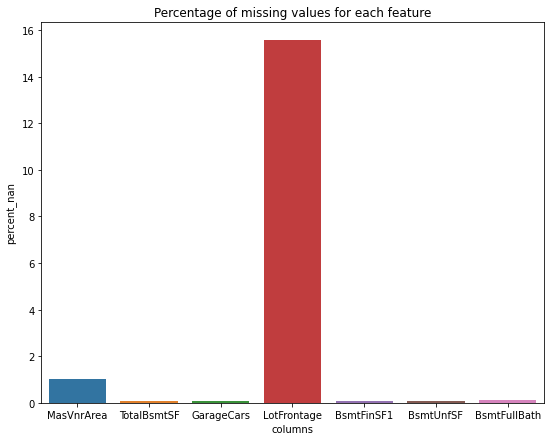

In [ ]:
#Visualizing the test dataset missing values
plt.figure(figsize=(9,7))
sns.barplot(data = missing_df_test, x='columns', y = 'percent_nan')
plt.title('Percentage of missing values for each feature')
plt.show()

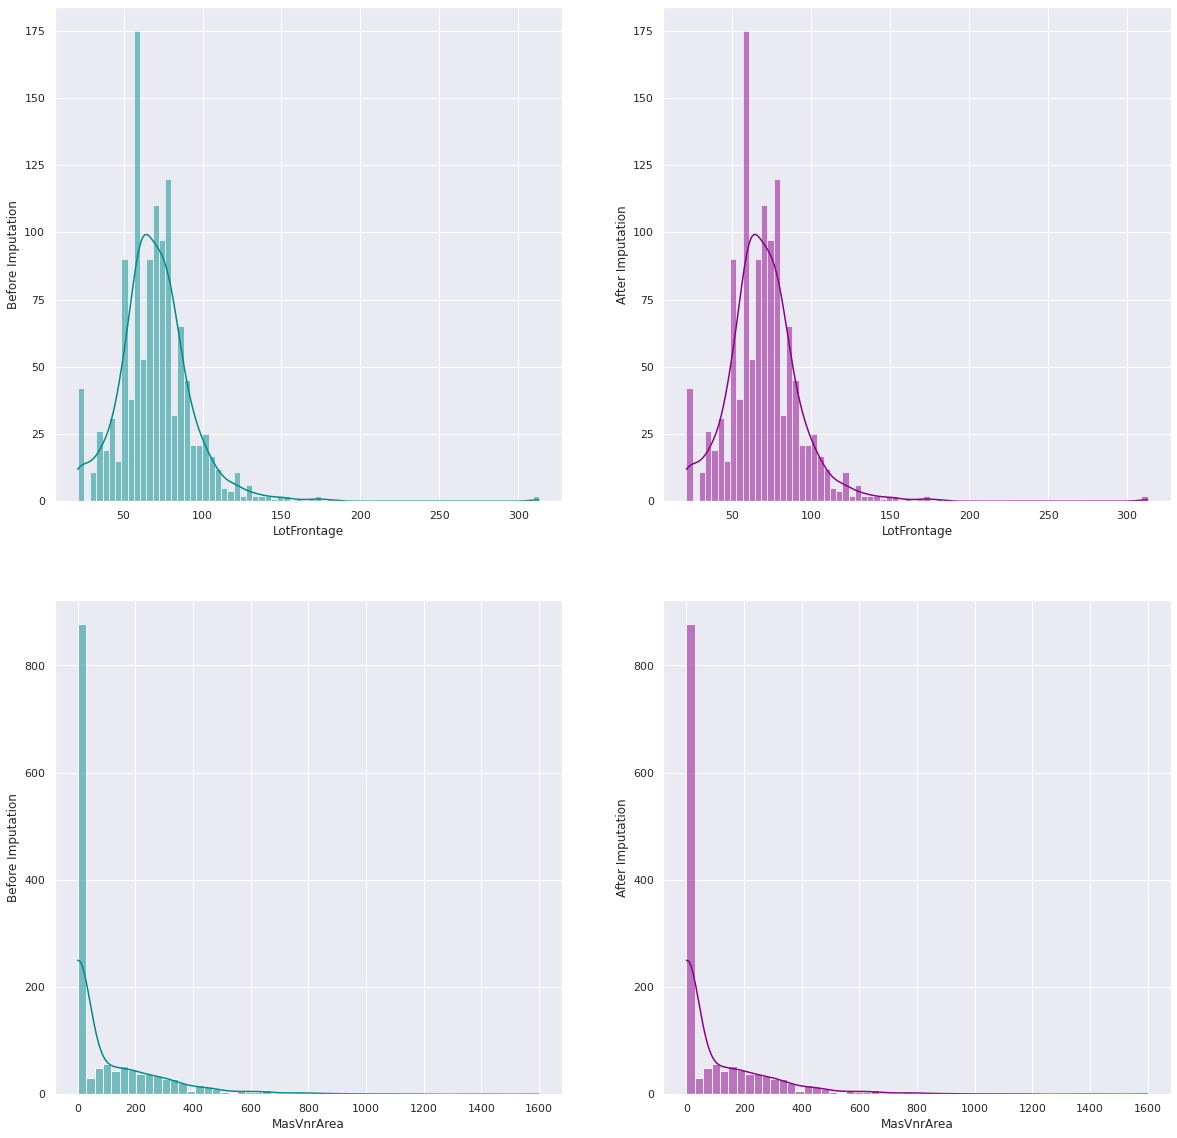

In [ ]:
#Missing value imputation for TRAIN dataset throught the imputation method scilearn
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
list_missing_train = ['LotFrontage', 'MasVnrArea']
#Replacing the missing values with median values
df_train_impute = pd.DataFrame(imputer.fit_transform(df_train_num), columns = df_train_num.columns)
#Visualizing the feature distribution before and after imputation
sns.set(rc={"figure.figsize": (20, 20)})
fig, axes = plt.subplots(2,2)
for col, fig_row in zip(list_missing_train,[0,1]):
  before_impute = sns.histplot(ax=axes[fig_row,0], x=df_train_num[col], kde=True, color='darkcyan')
  before_impute.set(ylabel='Before Imputation')
  after_impute = sns.histplot(ax=axes[fig_row, 1], x=df_train_num[col], kde=True, color='darkmagenta')
  after_impute.set(ylabel='After Imputation')


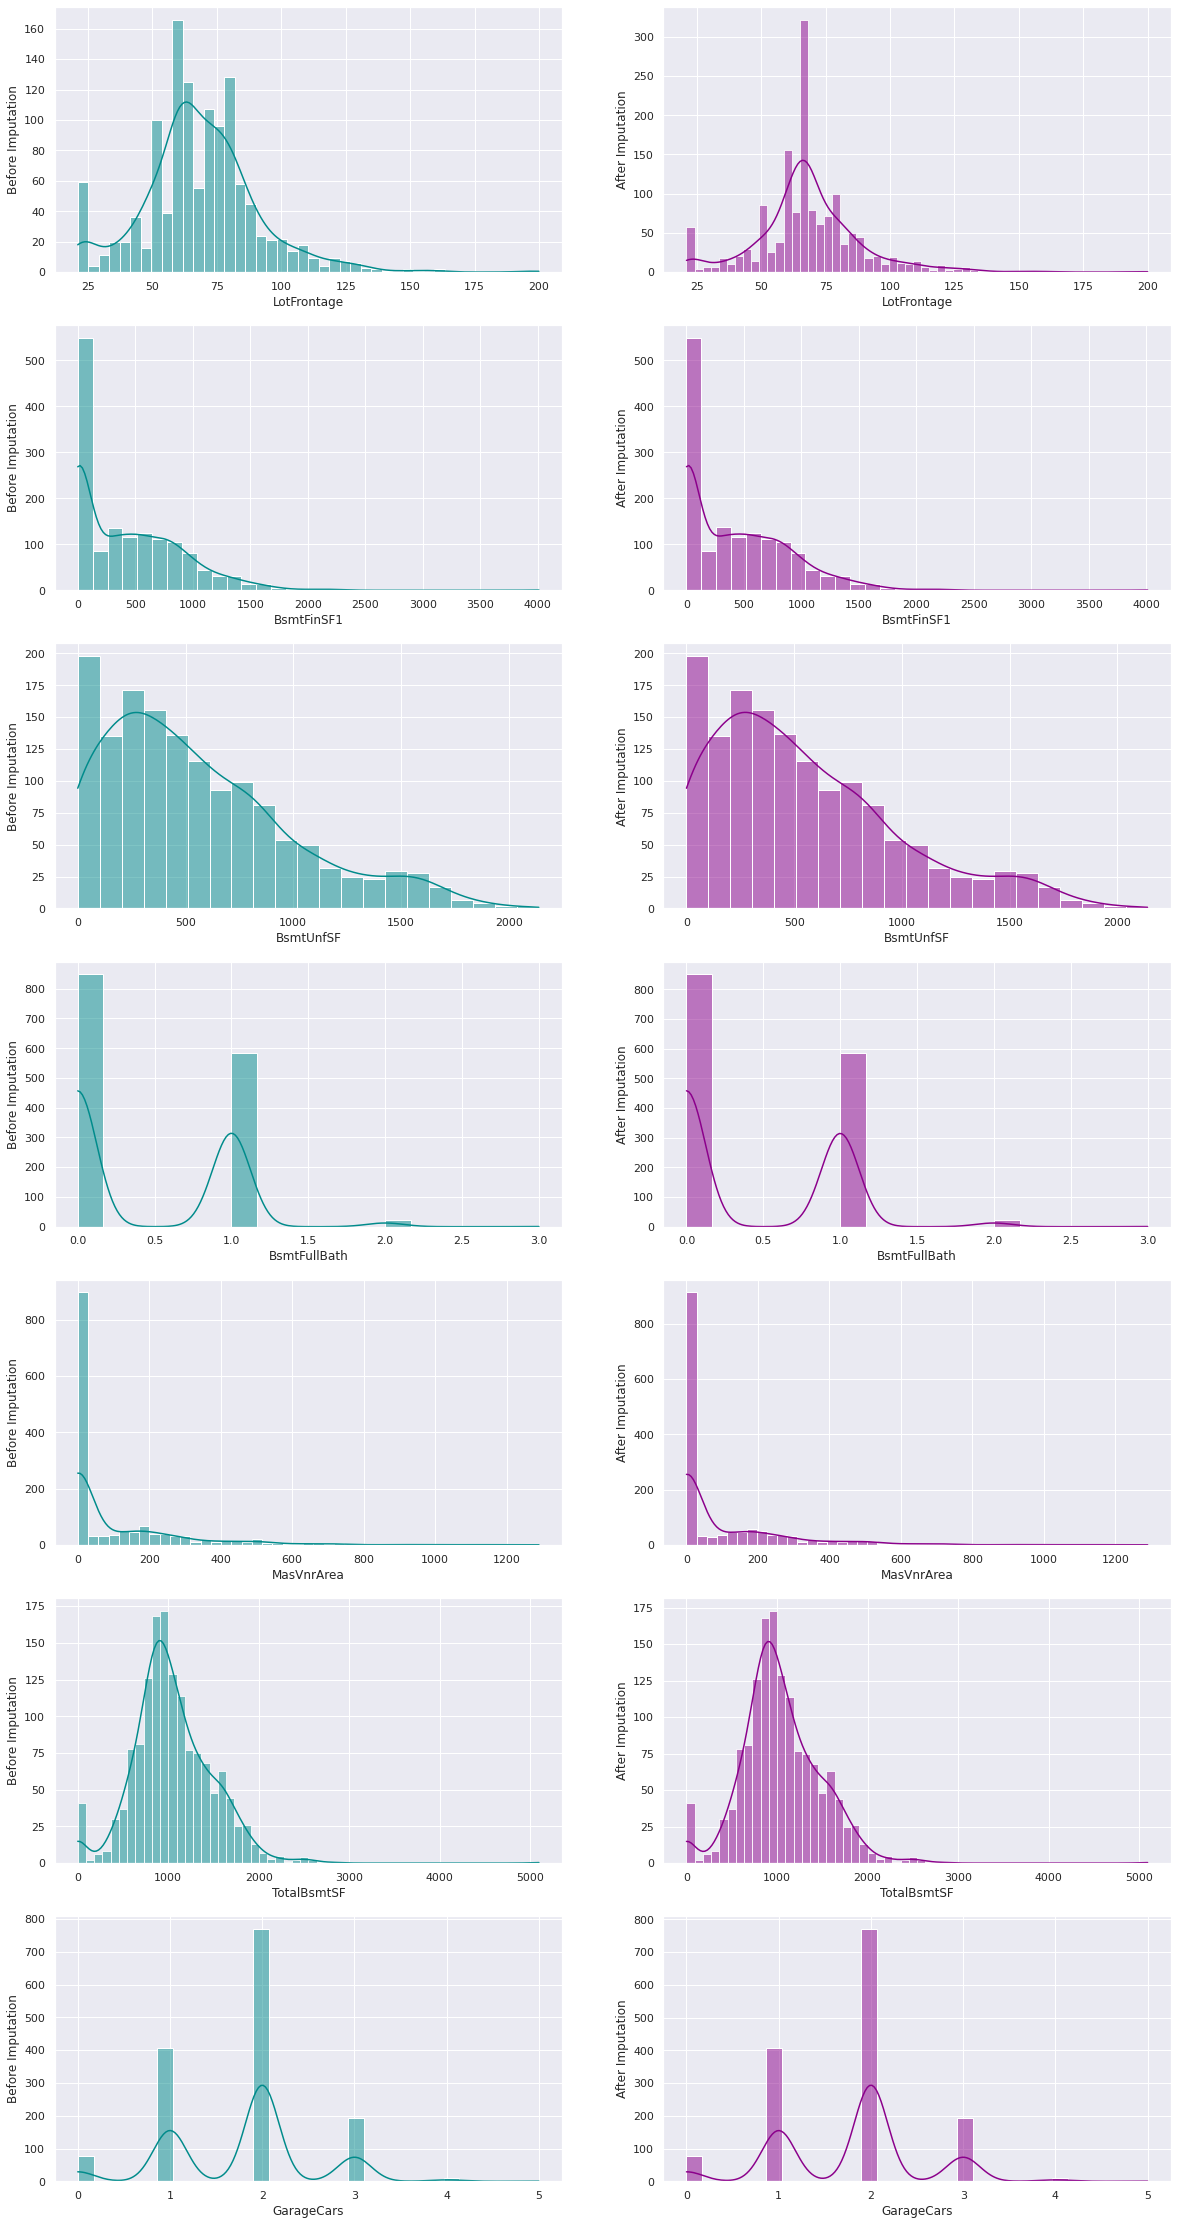

In [ ]:
#Same step for the test dataset features
list_missing_test = ['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'MasVnrArea', 'TotalBsmtSF', 'GarageCars']
df_test_impute = pd.DataFrame(imputer.fit_transform(df_test_num), columns = df_test_num.columns)
#Visualizing the features before and after imputation
sns.set(rc={"figure.figsize": (20, 40)})
fig, axes = plt.subplots(7,2)
for col, fig_row in zip(list_missing_test, range(0,7)):
  before_impute = sns.histplot(ax=axes[fig_row,0], x=df_test_num[col], kde=True, color='darkcyan')
  before_impute.set(ylabel='Before Imputation')
  after_impute = sns.histplot(ax=axes[fig_row,1],x=df_test_impute[col],kde=True,color='darkmagenta')
  after_impute.set(ylabel='After Imputation')

In [ ]:
#Dropping LotFrontage since the value changed after imputation
df_test_impute.head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,LotFrontage,LotArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,WoodDeckSF,OpenPorchSF,ScreenPorch
0,5.0,896.0,1961.0,1961.0,0.0,882.0,1.0,0.0,1.0,80.0,11622.0,468.0,270.0,0.0,0.0,0.0,2.0,140.0,0.0,120.0
1,6.0,1329.0,1958.0,1958.0,108.0,1329.0,1.0,0.0,1.0,81.0,14267.0,923.0,406.0,0.0,0.0,1.0,3.0,393.0,36.0,0.0
2,5.0,1629.0,1997.0,1998.0,0.0,928.0,2.0,1.0,2.0,74.0,13830.0,791.0,137.0,701.0,0.0,1.0,3.0,212.0,34.0,0.0
3,6.0,1604.0,1998.0,1998.0,20.0,926.0,2.0,1.0,2.0,78.0,9978.0,602.0,324.0,678.0,0.0,1.0,3.0,360.0,36.0,0.0
4,8.0,1280.0,1992.0,1992.0,0.0,1280.0,2.0,0.0,2.0,43.0,5005.0,263.0,1017.0,0.0,0.0,0.0,2.0,0.0,82.0,144.0


## Categorical Features Exploration

In [ ]:
df_train_cat = df_train.select_dtypes('object')
df_test_cat = df_test.select_dtypes('object')
#checking for new dataframes
df_train_cat.info()
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [ ]:
#Addressing missing data in categorical features (Train and Test Set)
col_nan_train_cat = df_train_cat.loc[:, df_train_cat.isnull().any()].columns
col_nan_test_cat = df_test_cat.loc[:, df_test_cat.isnull().any()].columns

     columns_cat  percent_nan
0          Alley        93.77
1     MasVnrType         0.55
2       BsmtQual         2.53
3       BsmtCond         2.53
4   BsmtExposure         2.60
5   BsmtFinType1         2.53
6   BsmtFinType2         2.60
7     Electrical         0.07
8    FireplaceQu        47.26
9     GarageType         5.55
10  GarageFinish         5.55
11    GarageQual         5.55
12    GarageCond         5.55
13        PoolQC        99.52
14         Fence        80.75
15   MiscFeature        96.30


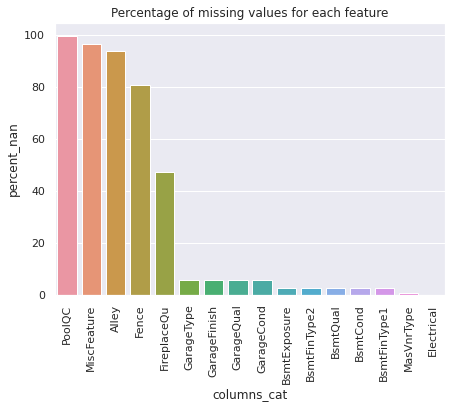

In [ ]:
#Building a dataframe with categorical missing values (Train Set)
cols_train_cat = []
percent_nan_train_cat = []

for i in col_nan_train_cat:
  cols_train_cat.append(i)
  percent_nan_train_cat.append(round(df_train_cat[i].isnull().sum() * 100 / len(df_train_cat),2))
missing_df_train_cat = pd.DataFrame(np.array(cols_train_cat), columns = ["columns_cat"])
missing_df_train_cat['percent_nan'] = np.array(percent_nan_train_cat)

print(missing_df_train_cat)
# Visualization of Nan Values
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_train_cat, x='columns_cat', y ='percent_nan', order=missing_df_train_cat.sort_values('percent_nan', ascending=False).columns_cat)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation = 90)
plt.show()

     columns_cat  percent_nan
0       MSZoning         0.27
1          Alley        92.67
2      Utilities         0.14
3    Exterior1st         0.07
4    Exterior2nd         0.07
5     MasVnrType         1.10
6       BsmtQual         3.02
7       BsmtCond         3.08
8   BsmtExposure         3.02
9   BsmtFinType1         2.88
10  BsmtFinType2         2.88
11   KitchenQual         0.07
12    Functional         0.14
13   FireplaceQu        50.03
14    GarageType         5.21
15  GarageFinish         5.35
16    GarageQual         5.35
17    GarageCond         5.35
18        PoolQC        99.79
19         Fence        80.12
20   MiscFeature        96.50
21      SaleType         0.07


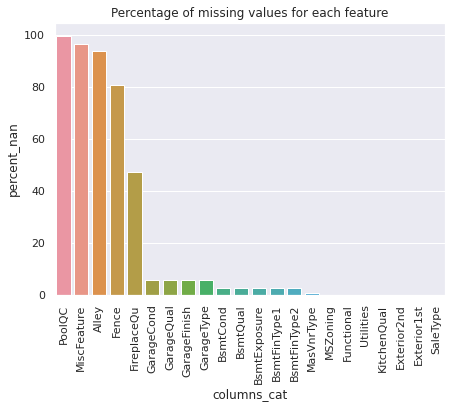

In [ ]:
#Same for test dataset
cols_test_cat = []
percent_nan_test_cat = []

for i in col_nan_test_cat:
  cols_test_cat.append(i)
  percent_nan_test_cat.append(round(df_test_cat[i].isnull().sum() * 100 / len(df_test_cat),2))
missing_df_test_cat = pd.DataFrame(np.array(cols_test_cat), columns = ["columns_cat"])
missing_df_test_cat['percent_nan'] = np.array(percent_nan_test_cat)

print(missing_df_test_cat)
# Visualization of Nan Values
plt.figure(figsize=(7,5))
sns.barplot(data = missing_df_train_cat, x='columns_cat', y ='percent_nan', order=missing_df_test_cat.sort_values('percent_nan', ascending=False).columns_cat)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Drop features with a high percentage of missing values
df_train_cat = df_train_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
df_test_cat = df_test_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

print(df_train_cat.shape)
print(df_test_cat.shape)

(1460, 38)
(1459, 38)


In [ ]:
#Adding mode values to missing values in each cat feature
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

print(df_train_cat.loc[:, df_train_cat.isnull().any()].columns)
print(df_test_cat.loc[:, df_test_cat.isnull().any()].columns)

Index([], dtype='object')
Index([], dtype='object')


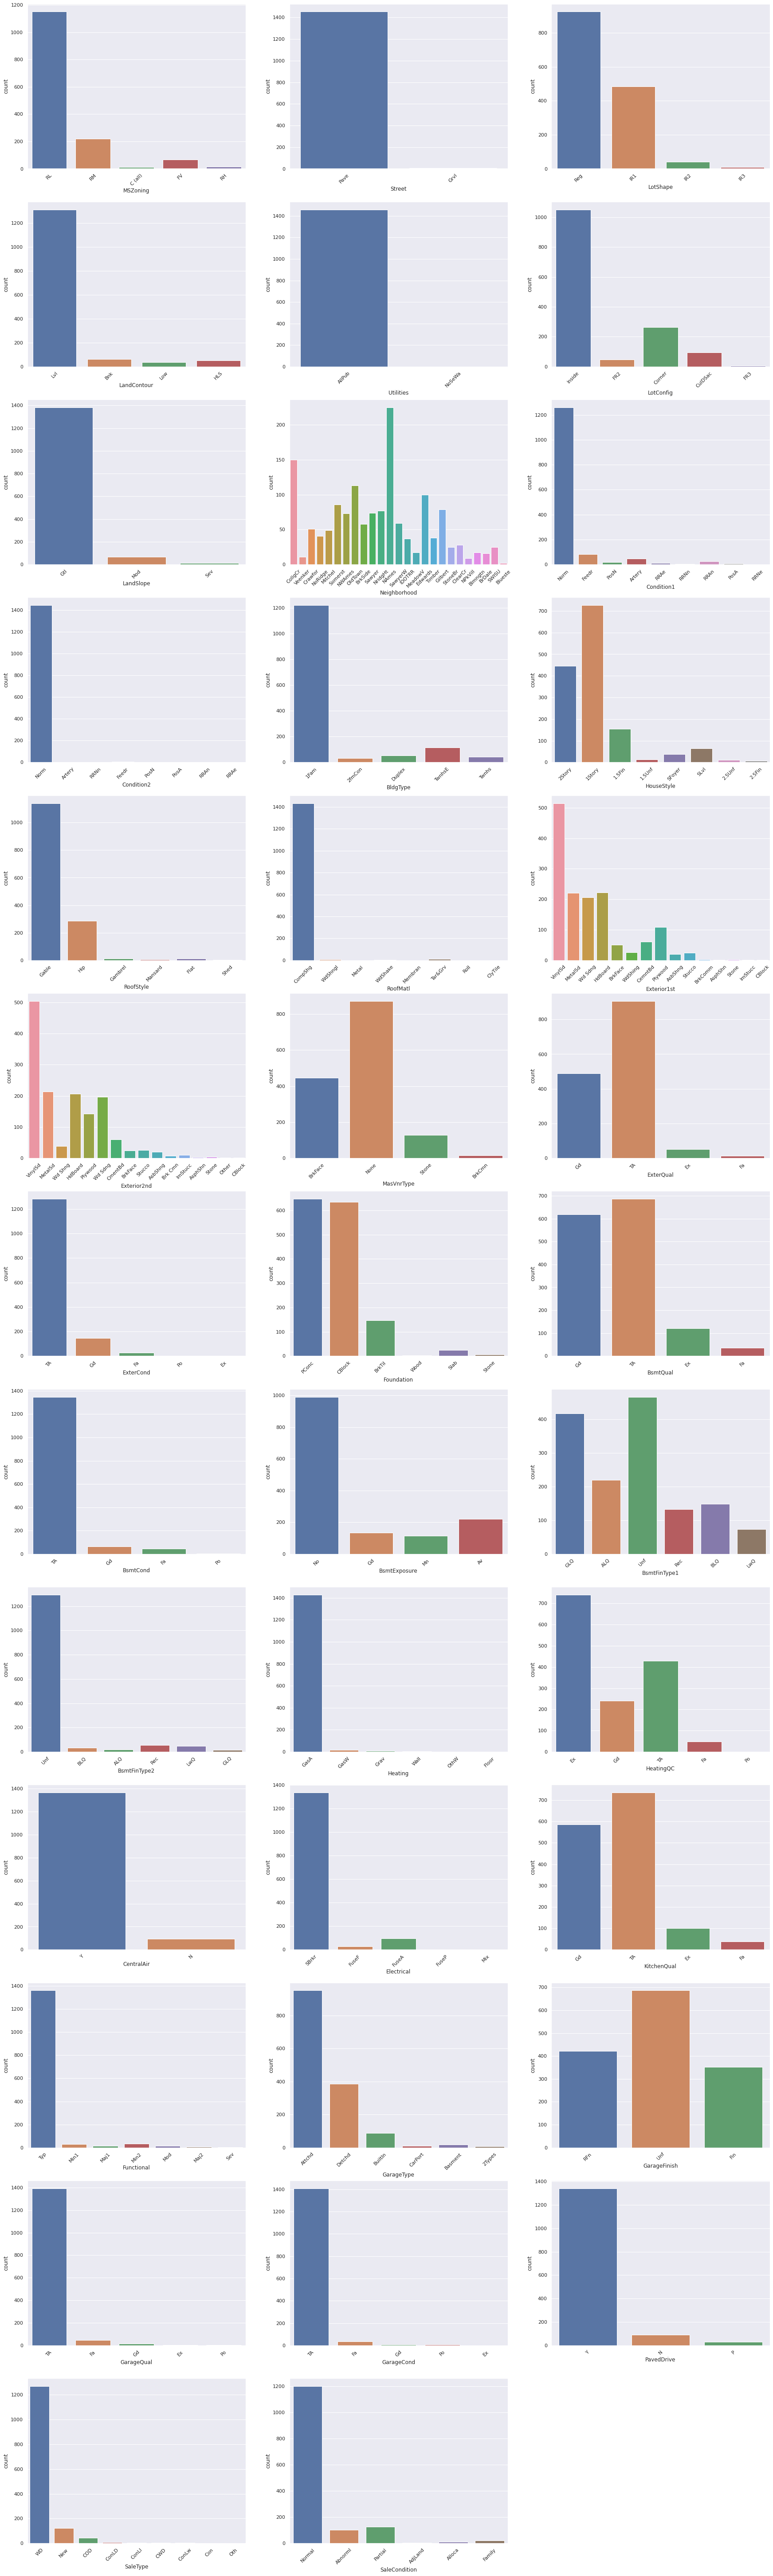

In [ ]:
#Categorical features Distribution (Train Set)
count =1
plt.subplots(figsize=(30, 130))
for i in df_train_cat.columns:
  plt.subplot(16,3,count)
  sns.countplot(df_train_cat[i])
  count+=1

  plt.xticks(rotation = 45)
plt.show()

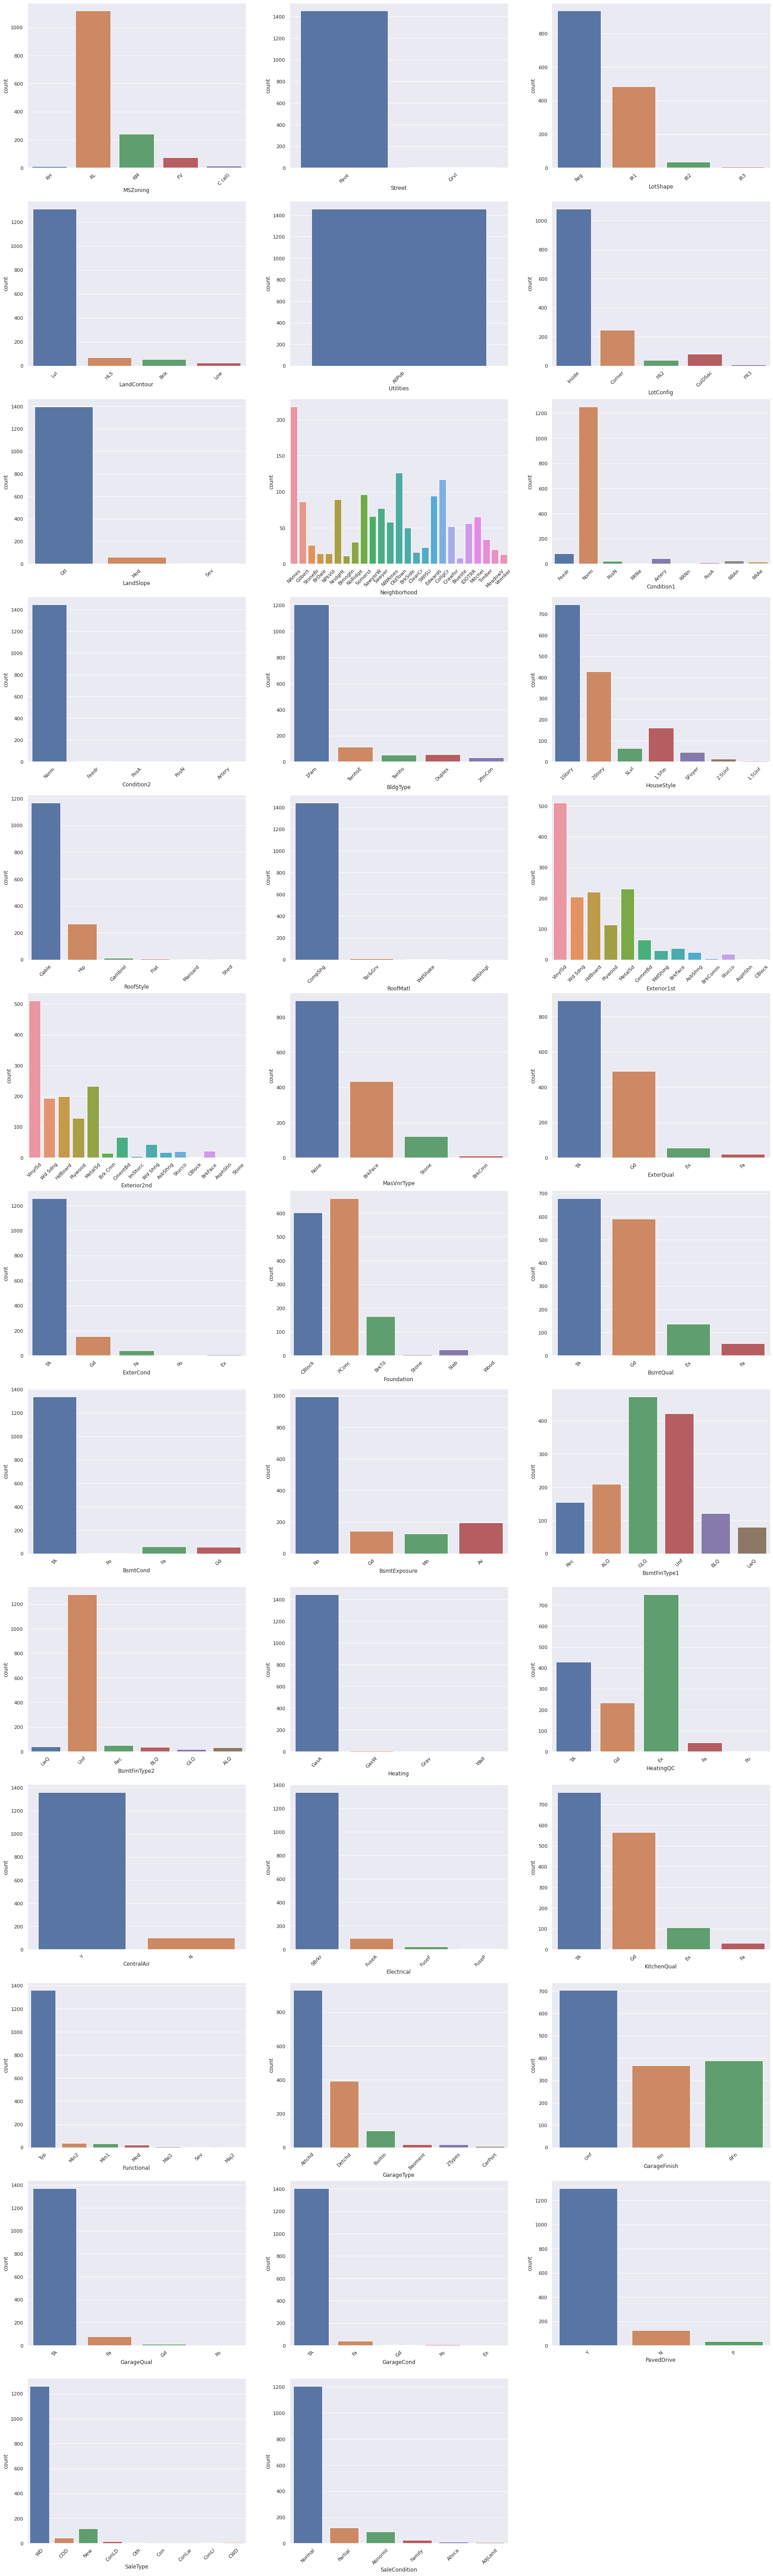

In [ ]:
#Categorical Features Distribution (Test Set)
count=1
plt.subplots(figsize=(30, 130))
for i in df_test_cat.columns:
    plt.subplot(16,3,count)
    sns.countplot(df_test_cat[i])
    count+=1

    plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Percentage of each value for each feature (Train Set)
for i in df_train_cat.columns:
  print(df_train_cat.value_counts(i, normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
dtype: float64
Street
Pave    0.99589
Grvl    0.00411
dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU    

In [ ]:
#Percentage of each value for each feature (Test Set)
for i in df_test_cat.columns:
  print(df_test_cat.value_counts(i, normalize=True))

MSZoning
RL         0.766278
RM         0.165867
FV         0.050720
C (all)    0.010281
RH         0.006854
dtype: float64
Street
Pave    0.995888
Grvl    0.004112
dtype: float64
LotShape
Reg    0.640164
IR1    0.331734
IR2    0.023989
IR3    0.004112
dtype: float64
LandContour
Lvl    0.898561
HLS    0.047978
Bnk    0.037012
Low    0.016450
dtype: float64
Utilities
AllPub    1.0
dtype: float64
LotConfig
Inside     0.740918
Corner     0.169979
CulDSac    0.056203
FR2        0.026045
FR3        0.006854
dtype: float64
LandSlope
Gtl    0.956820
Mod    0.041124
Sev    0.002056
dtype: float64
Neighborhood
NAmes      0.149417
OldTown    0.086361
CollgCr    0.080192
Somerst    0.065798
Edwards    0.064428
NridgHt    0.061001
Gilbert    0.058944
Sawyer     0.052776
SawyerW    0.045236
Mitchel    0.044551
NWAmes     0.039753
IDOTRR     0.038382
Crawfor    0.035641
BrkSide    0.034270
Timber     0.023304
NoRidge    0.020562
StoneBr    0.017820
SWISU      0.015764
MeadowV    0.013708
ClearCr    

In [ ]:
#List of categorical features that are going to be dropped
drop_list = ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual',\
             'GarageCond','PavedDrive']
#Dropping the quasi constant features from Train and Test Dataset
df_train_cat = df_train_cat.drop(drop_list, axis=1)
df_test_cat = df_test_cat.drop(drop_list, axis=1)

In [ ]:
#Number of columns after dropping features
print(df_train_cat.shape)
print(df_test_cat.shape)

(1460, 25)
(1459, 25)


In [ ]:
#Appending dependent variable with categorical features
df_train_cat = df_train_cat.join(df_train['SalePrice'])

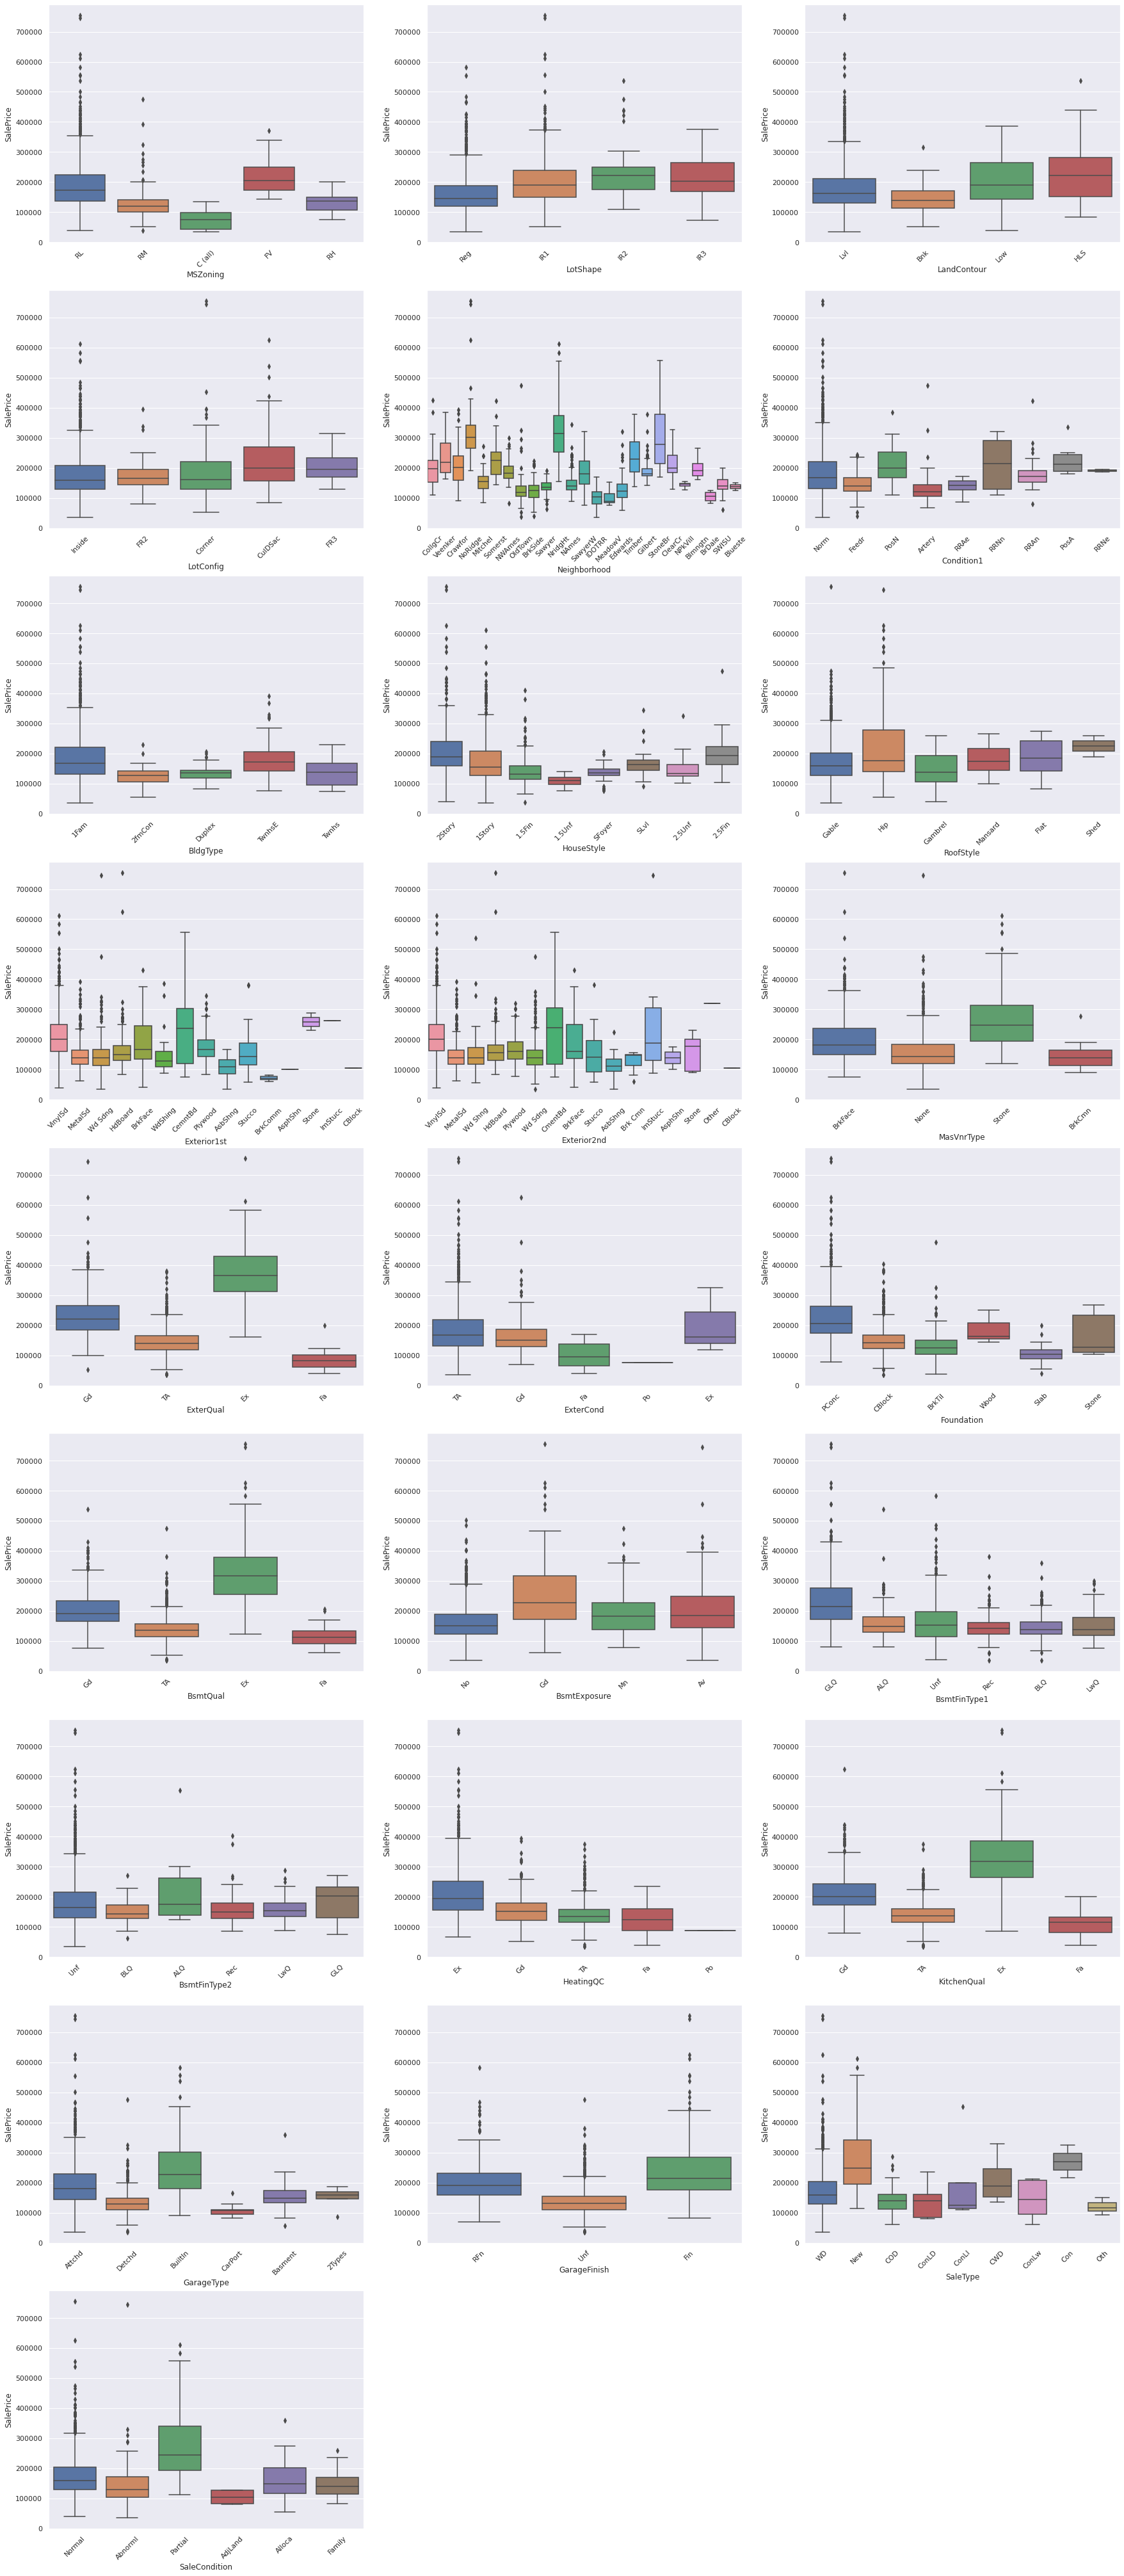

In [ ]:
#Plotting the distribution of observations in each categorical features
count=1
plt.subplots(figsize=(30, 130))
for i in df_test_cat.columns:
  plt.subplot(16,3,count)
  sns.boxplot(data = df_train_cat, x = i, y = 'SalePrice')
  count+=1

  plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Features with same distributions: (Exterior1st and Exterior2nd) (ExterQual, BsmtQual, KitchenQual)
#Chi Squared test for Independence for categorical values
#Libraries used:
import researchpy as rp
import scipy.stats as stats

#Testing the relationship between the 'Exterior1st' and 'Exterior2nd'
crosstab_1, test_results_1, expected_1 = rp.crosstab(df_train_cat['Exterior1st'], df_train_cat['Exterior2nd'], test = 'chi-square', expected_freqs= True, prop= 'cell')

#Checking the relationship between 'ExterQual' and 'BsmtQual'
crosstab_2, test_results_2, expected_2 = rp.crosstab(df_train_cat['ExterQual'], df_train_cat['BsmtQual'], test = 'chi-square', expected_freqs= True, prop= 'cell')

#Checking the relationship between 'ExterQual' and 'KitchenQual'
crosstab_3, test_results_3, expected_3 = rp.crosstab(df_train_cat['ExterQual'], df_train_cat['KitchenQual'], test = 'chi-square', expected_freqs= True, prop= 'cell')

print(f'The test results for Exterior1st and Exterior2nd are:\n{test_results_1}\n')
print(f'The test results for ExterQual and BsmtQual are:\n{test_results_1}\n')
print(f'The test results for ExterQual and KitchenQual are:\n{test_results_1}\n')

The test results for Exterior1st and Exterior2nd are:
                  Chi-square test     results
0  Pearson Chi-square ( 210.0) =   11868.6784
1                      p-value =       0.0000
2                   Cramer's V =       0.7620

The test results for ExterQual and BsmtQual are:
                  Chi-square test     results
0  Pearson Chi-square ( 210.0) =   11868.6784
1                      p-value =       0.0000
2                   Cramer's V =       0.7620

The test results for ExterQual and KitchenQual are:
                  Chi-square test     results
0  Pearson Chi-square ( 210.0) =   11868.6784
1                      p-value =       0.0000
2                   Cramer's V =       0.7620



In [ ]:
#Dropping features
to_drop = ['Exterior2nd', 'BsmtQual', 'KitchenQual']

df_train_cat.drop(to_drop, axis=1, inplace=True)
df_test_cat.drop(to_drop, axis=1, inplace=True)

In [ ]:
#Final shape of the categorical features
print(f'The number of features in the train dataset are:{df_train_cat.shape[1]}')
print(f'The number of features in the test dataset are:{df_test_cat.shape[1]}')

The number of features in the train dataset are:23
The number of features in the test dataset are:22


In [ ]:
#One-hot label encoding (Get Dummies Method)
df_train_cat.drop('SalePrice', axis=1, inplace=True)

#Getting binary features instead of objects
df_train_dumm = pd.get_dummies(df_train_cat)
df_train_dumm.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Same for the test set
df_test_dumm = pd.get_dummies(df_test_cat)
df_test_dumm.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Train and test dataset should have the same numbers of features
#Checking the features that are present in the train set and not in the test set
train_features = [x for x in df_train_dumm.columns if x not in df_test_dumm.columns]

print(f'The features that are present in the train dataset not in the test dataset are: {train_features}')

#Test dataset
test_features = [x for x in df_test_dumm.columns if x not in df_test_dumm.columns]

print(f'The features that are present in the train dataset not in the test dataset are: {test_features}')

The features that are present in the train dataset not in the test dataset are: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']
The features that are present in the train dataset not in the test dataset are: []


In [ ]:
#Dropping the excessive columns in the train set
df_train_dumm.drop(train_features, axis=1, inplace=True)

print(f'The number of features in the training dataset are:{df_train_dumm.shape[1]}')
print(f'The number of features in the testing dataset are: {df_test_dumm.shape[1]}')

The number of features in the training dataset are:147
The number of features in the testing dataset are: 147


## Feature Engineering

In [ ]:
#Deriving/initiating new features
df_train_impute['UnitAge'] = df_train_impute['YearBuilt'].max() - df_train_impute['YearBuilt']
df_test_impute['UnitAge'] = df_test_impute['YearBuilt'].max() - df_test_impute['YearBuilt']

df_train_impute.drop('YearBuilt', axis=1, inplace=True)
df_test_impute.drop('YearBuilt', axis=1, inplace=True)

In [ ]:
df_train_impute['ModificAge'] = df_train_impute['YearRemodAdd'].max() - df_train_impute['YearRemodAdd']  
df_test_impute['ModificAge'] = df_test_impute['YearRemodAdd'].max() - df_test_impute['YearRemodAdd']
# Dropping `YearRemodAdd` feature
df_train_impute.drop('YearRemodAdd', axis=1, inplace=True)
df_test_impute.drop('YearRemodAdd', axis=1, inplace=True)

In [ ]:
#Checking the skewness of each numerical feature
for i in df_train_impute.columns:
  print(f'{i}: {df_train_impute[i].skew()}')

OverallQual: 0.2169439277628693
GrLivArea: 1.3665603560164552
MasVnrArea: 2.6776164510820997
TotalBsmtSF: 1.5242545490627664
FullBath: 0.036561558402727165
Fireplaces: 0.6495651830548841
GarageCars: -0.3425489297486655
LotFrontage: 2.4091466665496006
LotArea: 12.207687851233496
BsmtFinSF1: 1.685503071910789
BsmtUnfSF: 0.9202684528039037
2ndFlrSF: 0.8130298163023265
BsmtFullBath: 0.596066609663168
HalfBath: 0.675897448233722
BedroomAbvGr: 0.21179009627507137
WoodDeckSF: 1.5413757571931312
OpenPorchSF: 2.3643417403694404
ScreenPorch: 4.122213743143115
SalePrice: 1.8828757597682129
UnitAge: 0.6134611724881861
ModificAge: 0.5035620027004843


In [ ]:
skewed = []
# Get the highly skewed features
for i in df_train_impute.columns:
    if abs(df_train_impute[i].skew()) > 0.5:
        skewed.append(i)
print(skewed)

['GrLivArea', 'MasVnrArea', 'TotalBsmtSF', 'Fireplaces', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SalePrice', 'UnitAge', 'ModificAge']


In [ ]:
#Removal of 'SalePrice' from the skewed test
skewed.remove('SalePrice')

#a copy from the old dataset for log transformation
df_train_logged = df_train_impute.copy()
df_test_logged = df_test_impute.copy()

#Log transformation
df_train_logged[skewed] = df_train_impute[skewed].apply(lambda x: np.log(x+1))
df_test_logged[skewed] = df_test_impute[skewed].apply(lambda x: np.log(x+1))

In [ ]:
#Log tranforming the target variable ('SalePrice')
df_train_logged['SalePrice'] = np.log(df_train_logged)['SalePrice']

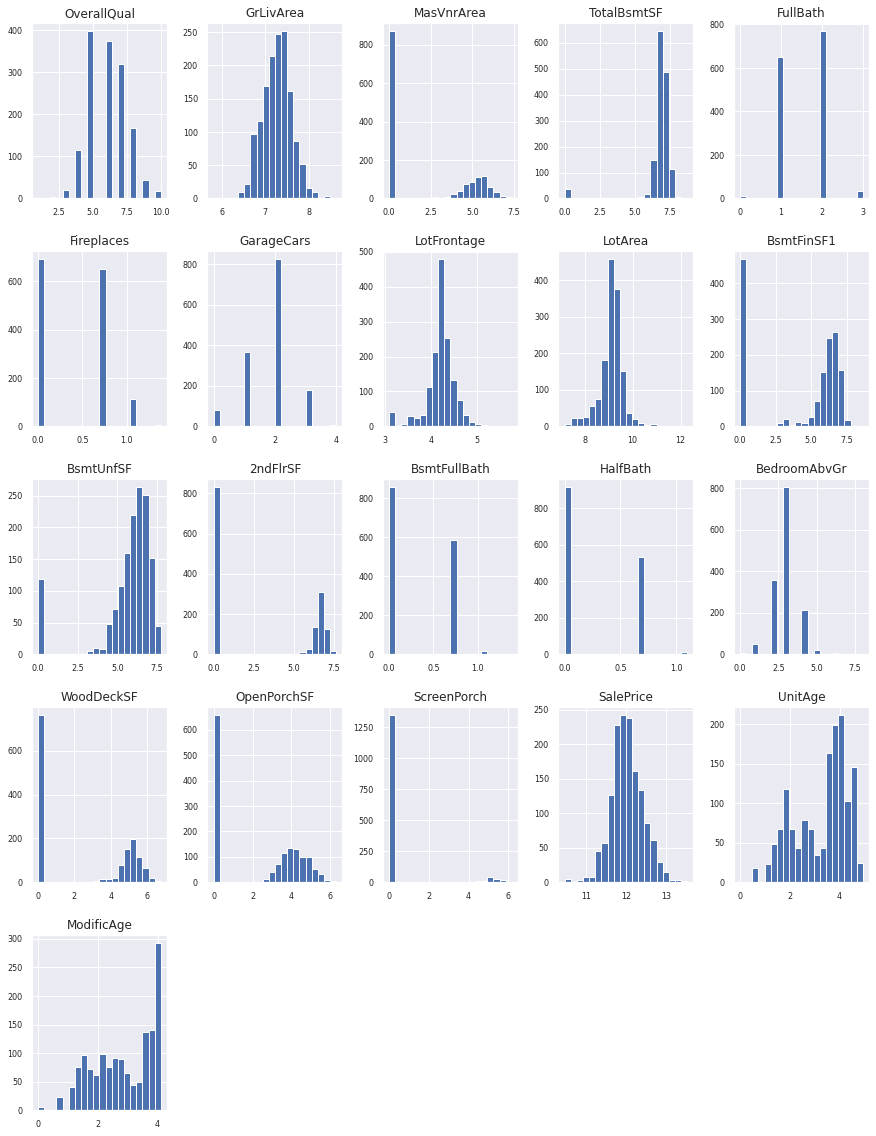

In [ ]:
#Visualizing the features after log transformation
df_train_logged.hist(figsize=(15, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
#Merging categorical and numerical features in one dataframe
df_train_merge = pd.concat([df_train_logged, df_train_dumm], axis=1)
df_test_merge = pd.concat([df_test_logged, df_test_dumm], axis=1)

print(f'Train datatset shape: {df_train_merge.shape}')
print(f'Test dataset shape: {df_test_merge.shape}')

Train datatset shape: (1460, 168)
Test dataset shape: (1459, 167)


## Data Preparation for Modelling

In [ ]:
#Predictors in X and target variable in Y
X = df_train_merge[[x for x in df_train_merge.columns if x != 'SalePrice']]
y = df_train_merge['SalePrice']
#Shape of X and Y
print(X.shape, y.shape)

(1460, 167) (1460,)


In [ ]:
#Data Standarization
from sklearn.preprocessing import StandardScaler
#Train set (X)
std_scaler = StandardScaler().fit(X)
X_transform = std_scaler.transform(X)
#Applying standardizaiton on the test set
df_test_transform = std_scaler.transform(df_test_merge)

In [ ]:
#Transforming standardised data into dataframes
X_transform = pd.DataFrame(X_transform, columns=X.columns)
df_test_transform = pd.DataFrame(df_test_transform, columns = df_test_merge.columns)

y = pd.DataFrame(y).reset_index().drop('index', axis=1)

## Backward Stepwise Regression

In [ ]:
#Required Libraries
import statsmodels.api as sm

In [ ]:
selected_features = []

def backward_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
  included = list(X.columns)
  while True:
    changed = False
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
   
    #All coefficients except for the intercept
    pvalues = model.pvalues.iloc[1:]
    worst_pval = pvalues.max() 
   
    if worst_pval > threshold_out:
      changed =True
      worst_feature = pvalues.idxmax()
      included.remove(worst_feature)
      if verbose:
          print('Drop {} with p-value {}:'.format(worst_feature, worst_pval))
    if not changed:
          break
  selected_features.append(included)
  print(f'\nSelected Features:\n{selected_features[0]}')
backward_selection(X_transform, y)

Drop SaleType_Con with p-value 0.9920283723415022:
Drop Neighborhood_Blueste with p-value 0.9862215704083366:
Drop Neighborhood_Timber with p-value 0.9999295251408169:
Drop Exterior1st_WdShing with p-value 0.9655915987063666:
Drop Exterior1st_HdBoard with p-value 0.9646688772430465:
Drop 2ndFlrSF with p-value 0.9419858716286175:
Drop GarageFinish_RFn with p-value 0.9310691054135778:
Drop Condition1_PosA with p-value 0.9303293354508164:
Drop BsmtFinType2_LwQ with p-value 0.9284635429195861:
Drop BsmtFinType2_Unf with p-value 0.937108502754646:
Drop Neighborhood_CollgCr with p-value 0.9293730868483955:
Drop Neighborhood_SawyerW with p-value 0.9499236758671401:
Drop Exterior1st_AsphShn with p-value 0.9194736565148209:
Drop LandContour_Low with p-value 0.9095411322245849:
Drop ExterQual_Fa with p-value 0.9069733576808459:
Drop ExterQual_Gd with p-value 0.981133653296502:
Drop HouseStyle_1Story with p-value 0.9047618977758175:
Drop MasVnrType_Stone with p-value 0.8991112317983185:
Drop Cond

In [ ]:
#utlizing only the selected features in our training and test set
X_transform = X_transform[selected_features[0]]
df_test_transform = df_test_transform[selected_features[0]]

## Variance Inflation Factors (VIF)

In [ ]:
#Required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Feature'] = X_transform.columns
vif['VIF Factor'] = [variance_inflation_factor(X_transform.values, i) for i  in range(X_transform.shape[1])]
vif

,Feature,VIF Factor
0,OverallQual,3.698390
1,GrLivArea,4.531745
2,TotalBsmtSF,1.388186
3,FullBath,2.815773
4,Fireplaces,1.609892
5,GarageCars,2.169811
6,LotArea,2.244262
7,BsmtFinSF1,22.724632
8,BsmtFullBath,1.935474
9,HalfBath,2.249900


In [ ]:
#Dropping high VIF features ('BsmtFinSF1' and 'BsmtFinType1_Unf') from train and testing dataset
X_transform.drop(['BsmtFinSF1', 'BsmtFinType1_Unf'], axis=1, inplace=True)
df_test_transform.drop(['BsmtFinSF1', 'BsmtFinType1_Unf'], axis=1, inplace=True)

print(f'The shape of the X_transform dataframe is: {X_transform.shape}')
print(f'The shape of the df_test_transform dataframe is: {df_test_transform.shape}')

The shape of the X_transform dataframe is: (1460, 56)
The shape of the df_test_transform dataframe is: (1459, 56)


In [ ]:
#Splitting the train dataset into training and testing sets
#Required libraries
from sklearn.model_selection import train_test_split

#Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, y, test_size=0.2, shuffle=True, random_state=1)

## Model Building








Linear Regression

In [ ]:
#Model Evlauation Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def model_performance(model, test, pred):
  RMSE = np.sqrt(mean_squared_error(test, pred))
  R_Squared = r2_score(test, pred)

  print(f'Algorithm: {model}\n')
  print(f'Root Mean Squared Error: {RMSE}\n')
  print(f'Coefficient of Determination: {R_Squared}')

In [ ]:
#Required libraries for Linear Regression
from sklearn.linear_model import LinearRegression
#Intiating the linear model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_preds_lin = lin_model.predict(X_test)
model_performance("Linear Model", Y_test, y_preds_lin)

Algorithm: Linear Model

Root Mean Squared Error: 0.13147737821771516

Coefficient of Determination: 0.9003990744615394


Cross Validation (Linear Regression)

In [ ]:
#Required Libraries
from sklearn.model_selection import cross_val_score
#Implementing cross validation on the dataset
model_lin_r2_cross = cross_val_score(lin_model, X_transform, y, scoring = 'r2')
model_lin_rmse_cross = cross_val_score(lin_model, X_transform, y, scoring = 'neg_root_mean_squared_error')

print(f'R_Squared using the cross validation: {np.mean(model_lin_r2_cross)}')
print(f'RMSE using cross validation: {-1 * (np.mean(model_lin_rmse_cross))}')

R_Squared using the cross validation: 0.8911873528479438
RMSE using cross validation: 0.13111779633824674


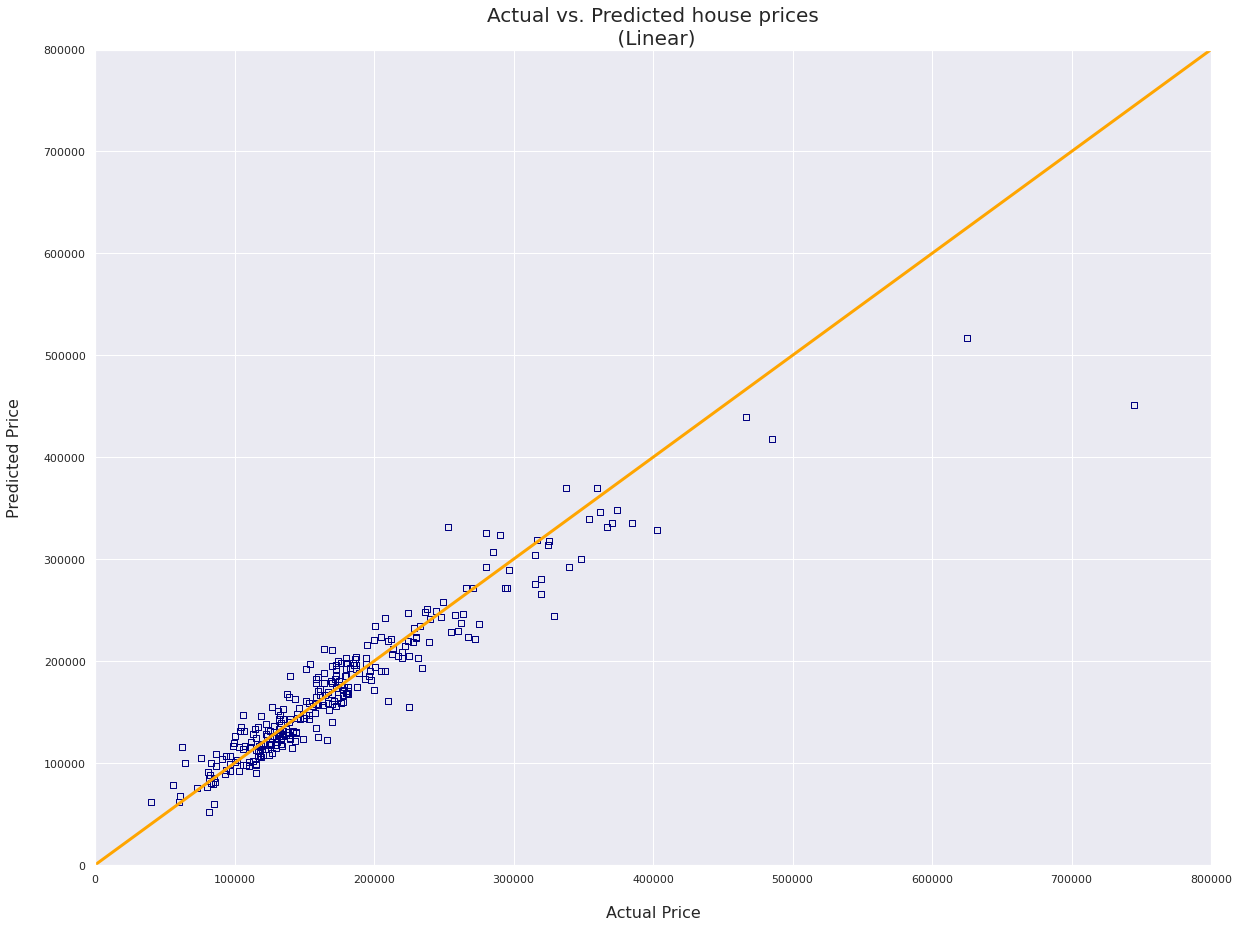

In [ ]:
# Plotting the relationship between actual and predicted price for linear regression model
plt.figure(figsize=(20,15))
plt.scatter(np.exp(Y_test), np.exp(y_preds_lin), color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
#Storing the results of the linear model in an empty list
algorithms = []
R_squared = []
RMSE = []
#Adding the results of the linear models
algorithms.append(lin_model.__class__.__name__)
R_squared.append(round(r2_score(Y_test, y_preds_lin),4))
RMSE.append(round(np.sqrt(mean_squared_error(Y_test, y_preds_lin)), 4))

Lasso Regression

In [ ]:
#Required libraries
from sklearn.linear_model import Lasso 
#Activating the lasso regression model
lass_model = Lasso(alpha=0.001)
lass_model.fit(X_train, Y_train)
y_preds_lass = lass_model.predict(X_test)
model_performance("Lasso Model", Y_test, y_preds_lass)

Algorithm: Lasso Model

Root Mean Squared Error: 0.1316146037283853

Coefficient of Determination: 0.9001910550938832


In [ ]:
#Cross validation on the dataset
model_lass_r2_cross = cross_val_score(lass_model, X_transform, y, scoring = 'r2')
model_lass_rmse_cross = cross_val_score(lass_model, X_transform, y, scoring = 'neg_root_mean_squared_error')
print(f'R_squared using cross validation: {np.mean(model_lass_r2_cross)}')
print(f'RMSE using cross validation: {-1 * (np.mean(model_lass_rmse_cross))}')

R_squared using cross validation: 0.8915626739332587
RMSE using cross validation: 0.13090461621038188


Hyperparameter Tuning for Lasso Model (Model Optimization)

In [ ]:
#GridSearchCv library
from sklearn.model_selection import GridSearchCV
#Lasso Model Tuning
#Choosing different alpha values
alphas = list(np.logspace(-5, 1, 50))
params = {'alpha' : alphas}
lass_grid = GridSearchCV(Lasso(), params, scoring='r2', verbose=1)
lass_grid.fit(X_train, Y_train)

print(f'R-squared for the optimized model: {lass_grid.best_score_}')
print(f'Best alpha for the optimized model: {lass_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R-squared for the optimized model: 0.8914807510629654
Best alpha for the optimized model: {'alpha': 0.00022229964825261955}


In [ ]:
#Constructing a optimized version of lasso model
lass_model_tune = Lasso(alpha = lass_grid.best_params_['alpha'])
lass_model_tune.fit(X_train, Y_train)
y_preds_lass_tune = lass_model_tune.predict(X_test)
model_performance("Optimized Lasso Model", Y_test, y_preds_lass_tune)

Algorithm: Optimized Lasso Model

Root Mean Squared Error: 0.13147296743764347

Coefficient of Determination: 0.9004057571382761


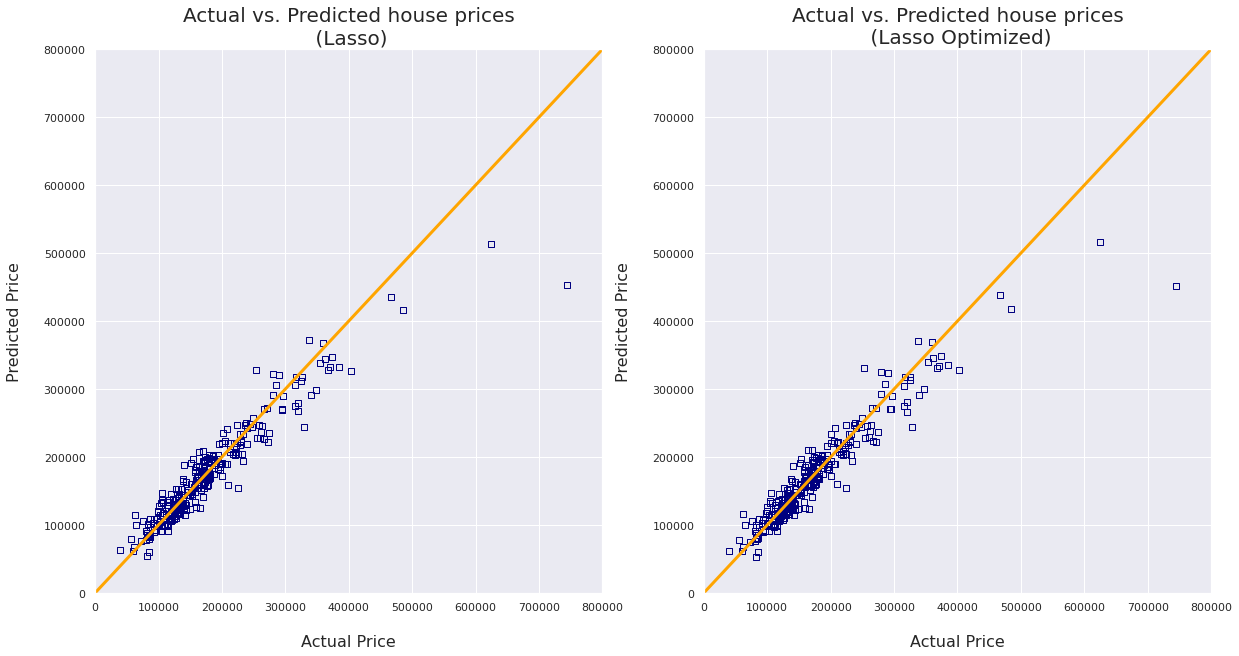

In [ ]:
#Visualization of lasso model before and after optimization
plt.figure(figsize=(20, 10))
# Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(Y_test), np.exp(y_preds_lass),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

# After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(Y_test), np.exp(y_preds_lass_tune),
            color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Lasso Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

In [ ]:
#Results of the lasso model
algorithms.append(lass_model_tune.__class__.__name__)
R_squared.append(round(r2_score(Y_test, y_preds_lass_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(Y_test, y_preds_lass_tune)),4))

Ridge Regression

In [ ]:
#Required Libraries
from sklearn.linear_model import Ridge
#Initiating Lasso Regression Model
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, Y_train)
y_preds_ridge = ridge_model.predict(X_test)
model_performance("Ridge Model", Y_test, y_preds_ridge)

Algorithm: Ridge Model

Root Mean Squared Error: 0.1314773703563274

Coefficient of Determination: 0.9003990863723561


Hyperparameter Tuning for the Ridge Regression Model

In [ ]:
#Using different alpha values
alphas = list(np.logspace(-5, 1, 50))
params = {'alpha': alphas}
ridge_grid = GridSearchCV(Ridge(), params, scoring='r2', verbose=1)

ridge_grid.fit(X_train, Y_train)

print(f'R-sqaured for the optimized model: {ridge_grid.best_score_}')
print(f'Best alpha for the optimized model: {ridge_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R-sqaured for the optimized model: 0.89163292171107
Best alpha for the optimized model: {'alpha': 10.0}


In [ ]:
#Constructing an optimized Ridge Regression Model
ridge_model_tune = Ridge(alpha = ridge_grid.best_params_['alpha'])
ridge_model_tune.fit(X_train, Y_train)
y_preds_ridge_tune = ridge_model_tune.predict(X_test)
model_performance("Ridge Model Optimized", Y_test, y_preds_ridge_tune)

Algorithm: Ridge Model Optimized

Root Mean Squared Error: 0.13142565143150411

Coefficient of Determination: 0.9004774304856081


Text(0, 0.5, 'Predicted Price\n')

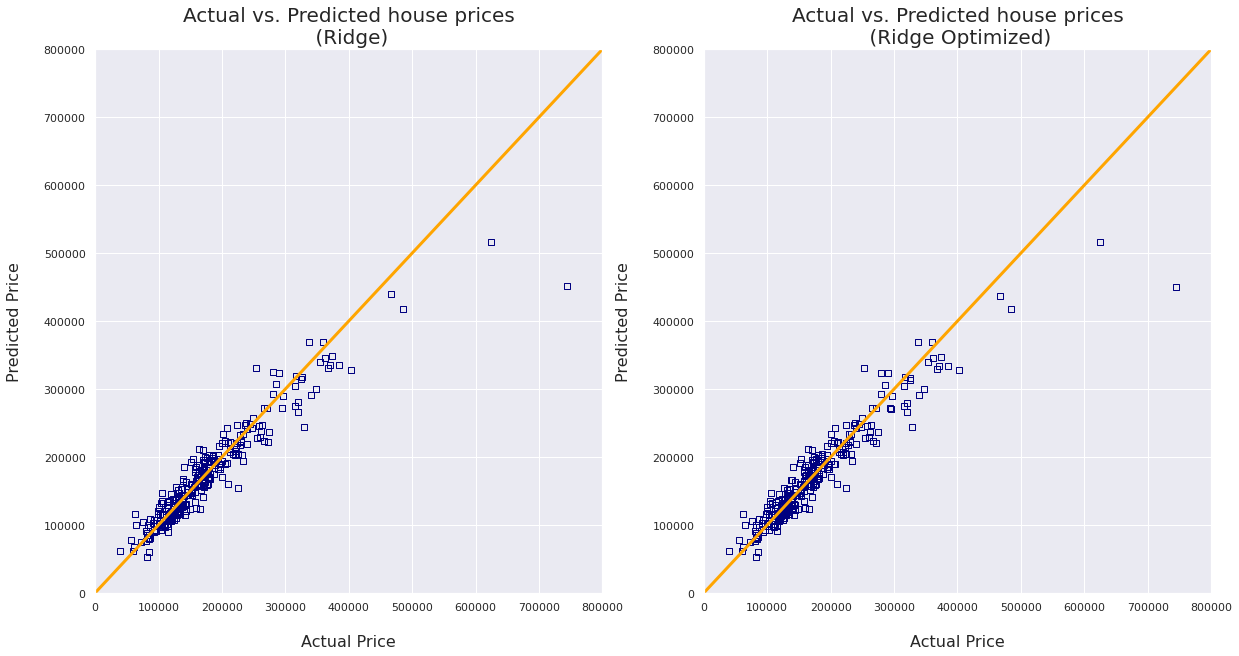

In [ ]:
#Visualzing the before and after ridge optimized model
plt.figure(figsize=(20, 10))
#Prior optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(Y_test), np.exp(y_preds_ridge), color="navy", marker="s", facecolors="none")

plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

#After optimization
plt.subplot(1,2,2)
plt.scatter(np.exp(Y_test), np.exp(y_preds_ridge_tune), color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Ridge Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

In [ ]:
#Results of the Ridge Model
algorithms.append(ridge_model_tune.__class__.__name__)
R_squared.append(round(r2_score(Y_test, y_preds_ridge_tune), 4))
RMSE.append(round(np.sqrt(mean_squared_error(Y_test, y_preds_ridge_tune)), 4))

Random Forest Regression

In [ ]:
#Required Libraries
from sklearn.ensemble import RandomForestRegressor
#Activating the Random Forest Regressor
rf_model = RandomForestRegressor (random_state=4)
rf_model.fit(X_train, Y_train) 
y_preds_rf = rf_model.predict(X_test)
model_performance("Random Forest Model", Y_test, y_preds_rf)

Algorithm: Random Forest Model

Root Mean Squared Error: 0.15196458859610765

Coefficient of Determination: 0.866940434498781


Hyperparameter Tuning for Random Forest Regressor Model

In [ ]:
#Model Tuning
#Choosing from different values of estimators
n_est = [10, 50, 100, 200, 300]

params = {'n_estimators': n_est}
rf_grid = GridSearchCV(RandomForestRegressor(), params, scoring='r2', verbose=1)

rf_grid.fit(X_train, Y_train)

print(f'R-Squared for the optimized model: {rf_grid.best_score_}')
print(f'Best number of estimators for the optimized model: {rf_grid.best_params_}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
R-Squared for the optimized model: 0.8575160082113022
Best number of estimators for the optimized model: {'n_estimators': 300}


In [ ]:
#Constructing an optimized Random Forest Model
rf_model_tune = RandomForestRegressor(n_estimators = rf_grid.best_params_['n_estimators'], random_state=4)
rf_model_tune.fit(X_train, Y_train)
y_preds_rf_tune = rf_model_tune.predict(X_test)
model_performance("Randon Forest Regressor Optimized", Y_test, y_preds_rf_tune)

Algorithm: Randon Forest Regressor Optimized

Root Mean Squared Error: 0.1492785102348015

Coefficient of Determination: 0.8716027009309614


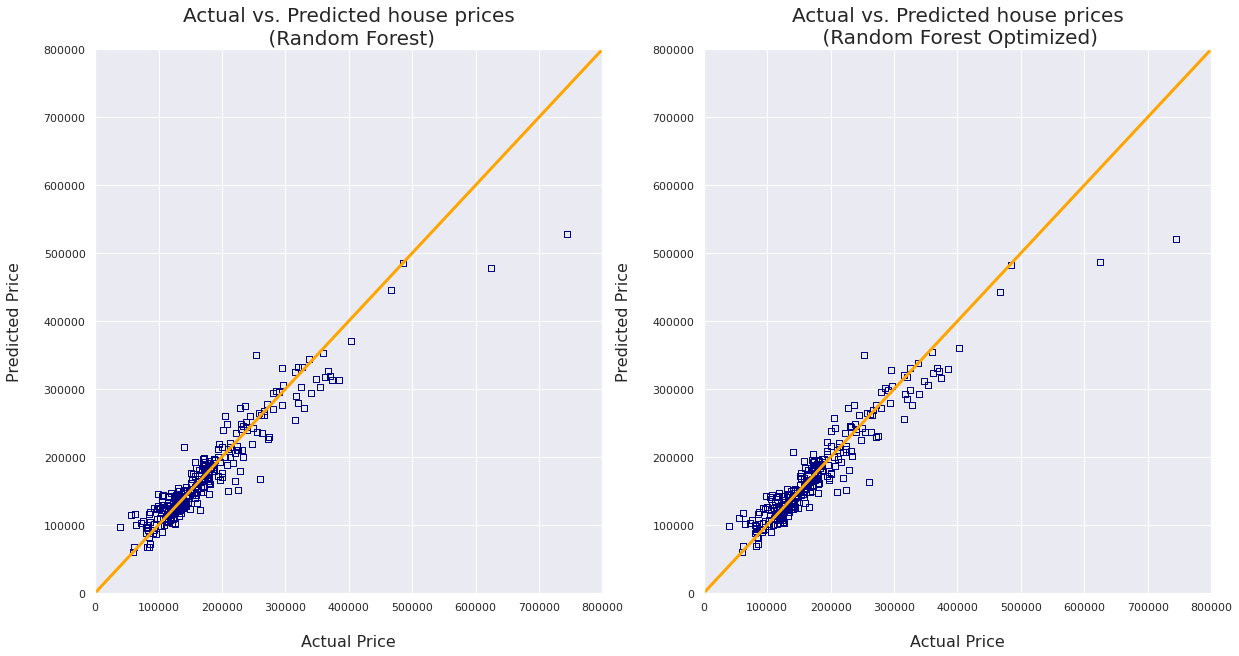

In [ ]:
#Visualization before and after optimization (RFR)
plt.figure(figsize=(20, 10))
#Before Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(Y_test), np.exp(y_preds_rf), color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

#After optimization
plt.subplot(1,2,2)
plt.scatter(np.exp(Y_test), np.exp(y_preds_rf_tune), color="navy", marker="s", facecolors="none")
plt.plot ([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (Random Forest Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
#Accumulating the results of Random Forest Regressor Model
algorithms.append(rf_model_tune.__class__.__name__)
R_squared.append(round(r2_score(Y_test, y_preds_rf_tune), 4))
RMSE.append(round(np.sqrt(mean_squared_error(Y_test, y_preds_rf_tune)), 4))

XGBoost Regressor Model

In [ ]:
#Required XGB Regression Library
from xgboost import XGBRegressor
#Activitatin the XGBoost Regression
xgb_model = XGBRegressor(random_state=4)
xgb_model.fit(X_train, Y_train)
y_preds_xgb = xgb_model.predict(X_test)
model_performance("XGB Model", Y_test, y_preds_xgb)

[23:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Algorithm: XGB Model

Root Mean Squared Error: 0.1406596529545823

Coefficient of Determination: 0.8860011719345694


Hyperparameter Tuning for XGBoost Model

In [ ]:
# Tuning the XGB model
# Choosing from different values of estimators
n_est = [100, 200, 500, 600]
# Choosing from different values of learning rates
learn_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]

colsample_bytree = [0.3, 0.5, 0.8]

params = {'n_estimators': n_est,
         'learning_rate': learn_rate,
         'colsample_bytree':colsample_bytree}
xgb_grid = GridSearchCV(XGBRegressor(), params, scoring='r2', verbose=1)

xgb_grid.fit(X_train, Y_train)

print(f'R-Squared for the optimized model: {xgb_grid.best_score_}')
print(f'Best number of estimators and learning rate for the optimized model: {xgb_grid.best_params_}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:42] WARNING: /workspace/src/objective/regr

In [ ]:
# Building optimized XGB Regression Model
xgb_model_tune = XGBRegressor(n_estimators = xgb_grid.best_params_['n_estimators'],\
                              learning_rate = xgb_grid.best_params_['learning_rate'], random_state=4)
xgb_model_tune.fit(X_train, Y_train)
y_preds_xgb_tune = xgb_model_tune.predict(X_test)
model_performance("XGB Model Optimized", Y_test, y_preds_xgb_tune)

[23:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Algorithm: XGB Model Optimized

Root Mean Squared Error: 0.13734989365899983

Coefficient of Determination: 0.8913028996994296


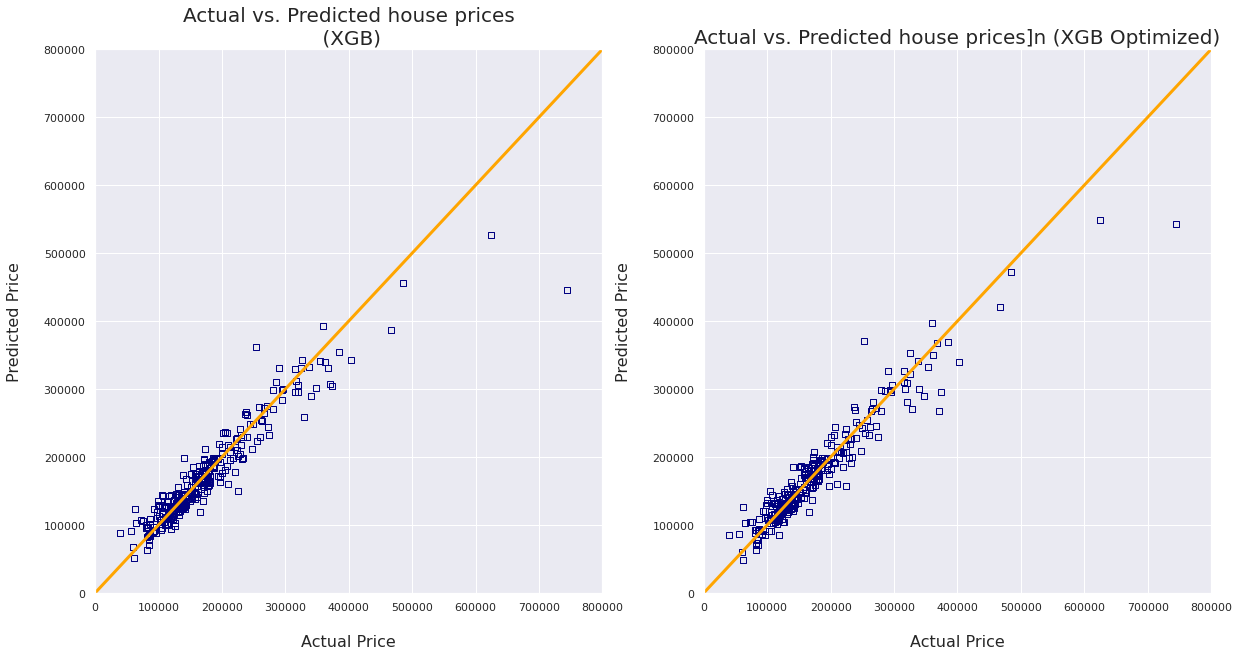

In [ ]:
#Visualizaiton before and after optimization
plt.figure(figsize=(20, 10))

#Prior Optimization
plt.subplot(1,2,1)

plt.scatter(np.exp(Y_test), np.exp(y_preds_xgb), color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0,800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices\n (XGB)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

#After Optimization
plt.subplot(1,2,2)

plt.scatter(np.exp(Y_test), np.exp(y_preds_xgb_tune), color="navy", marker="s", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=3)
plt.title("Actual vs. Predicted house prices]n (XGB Optimized)", fontsize=20)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)

plt.show()

In [ ]:
#Results of the XGB model
algorithms.append(xgb_model_tune.__class__.__name__)
R_squared.append(round(r2_score(Y_test, y_preds_xgb_tune),4))
RMSE.append(round(np.sqrt(mean_squared_error(Y_test, y_preds_xgb_tune)),4))

Final Results for Each Model

In [ ]:
#The final results for each model
final_results = pd.DataFrame({'Algorithm': algorithms, 'R_squared': R_squared, 'RMSE' : RMSE})
final_results

,Algorithm,R_squared,RMSE
0,LinearRegression,0.9004,0.1315
1,Lasso,0.9004,0.1315
2,Ridge,0.9005,0.1314
3,RandomForestRegressor,0.8716,0.1493
4,XGBRegressor,0.8913,0.1373


Prediction

In [ ]:
y_pred_test = np.exp(ridge_model_tune.predict(df_test_transform))
output = pd.DataFrame ({'Id': id_column, 'SalePrice': np.round(y_pred_test.reshape(1459,).tolist())})
output.head()

,Id,SalePrice
0,1461,114524.0
1,1462,145296.0
2,1463,173368.0
3,1464,183288.0
4,1465,211467.0


In [ ]:
output.to_csv('Submission.csv', index=False)